![IonQ Logo](logo.png)
# IonQ iQuHack2025 Challenge



Before proceeding, register once.  Then, comment out the registration function call to avoid re-registering when running the notebook again.

In [ ]:
import requests

def register():
    team_name = input("Enter your team name: ")
    in_person = input("Enter participation type - in-person or remote: ")
    data = []
    
    while email := input("Enter email separated by commas (enter to cancel): "):
        firstname = input("Enter your first name: ")
        lastname = input("Enter your last name: ")
        github = input("Enter your github handle: ")
        data.append((firstname, lastname, email, github))
    
    for firstname, lastname, email, github in data:
    	url = f"https://ionquhack2025.azurewebsites.net/api/registration?TeamName={team_name}&FirstName={firstname}&LastName={lastname}&Email={email}&GitHubHandle={github}&Remote-In-Person={in_person}"
        req = requests.post(url)
    	print("\n\n\n"+req.text)


# Comment this out after registration:
#register()

Enter the `key` you've got on the previous step here:

In [1]:
key = "782e18ab6499aac6fd4a91e97d78c4a63a9e21d7f80d355042e37648b8594375"

Did you comment out the `register()` function call?  

Please share your research process on GitHub: https://github.com/iQuHACK/2025-IonQ/discussions


## Maximum Cut problem (max-cut) with variational Quantum Imaginary Time Evolution (varQITE) method

In this challenge, we demonstrate how to leverage
[IonQ Forte][1]'s industry-leading capabilities to solve instances of the
[NP-hard][2] combinatorial optimization problem known as
[Maximum Cut (MaxCut)][3] using a
[novel variational Quantum Imaginary Time Evolution (varQITE)][4] algorithm
developed by IonQ in conjunction with researchers at Oak Ridge National Labs
(ORNL).

[1]: https://ionq.com/forte
[2]: https://en.wikipedia.org/wiki/NP-hardness
[3]: https://en.wikipedia.org/wiki/Maximum_cut
[4]: https://arxiv.org/pdf/2404.16135

## What's the problem? 
### MaxCut 101

The Maximum Cut Problem (MaxCut) is a classic combinatorial optimization
problem commonly used as an algorithm benchmark by scientific computing
researchers. It has numerous applications in a variety of fields: for example,
it is used in circuit desing as part of Very Large Scale Integration (VLSI) to
find the optimal layout of circuit components; it is used in the study of
social networks to identify communities; it is used in computer vision for
image segmentation, etc.

**MaxCut is a graph problem**: given a graph $G = (V, E)$ with vertex set $V$ and
edge set $E$, it asks for a partition of $V$ into sets $S$ and $T$ maximizing
the number of edges crossing between $S$ and $T$.

Think of it like this: you're trying to cut the graph into two pieces, and you 
want to make the cut so that it slices through as many edges as possible.


# Prepare the code environment
First, we'll set up the coding environment and install necessary dependencies.

In [1]:
! pip install qiskit qiskit-aer networkx numpy pandas -q

To ensure your code runs correctly everywhere, please only use the imported dependencies.  Using external libraries may cause your submission to fail due to missing dependencies on our servers.

In [1]:
## IonQ, Inc., Copyright (c) 2025,
# All rights reserved.
# Use in source and binary forms of this software, without modification,
# is permitted solely for the purpose of activities associated with the IonQ
# Hackathon at iQuHack2025 hosted by MIT and only during the Feb 1-2, 2025 
# duration of such event.

import matplotlib.pyplot as plt
from IPython import display

import networkx as nx
import numpy as np
import pandas as pd
import time

from typing import List
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator

# Graph definition

A simple graph, defined using the Python NetworkX library, will serve to illustrate the problem and you can explore further complexities.


In [2]:
# other graphs candidates to check

import networkx as nx
import matplotlib.pyplot as plt
import random

#-> Cycle Graph C8
def cycle_graph_c8():
    G = nx.cycle_graph(8)
    plt.figure(figsize=(6, 6))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
    plt.title("Cycle Graph C8")
    plt.show()
    return G

# Path Graph P16
def path_graph_p16():
    G = nx.path_graph(16)
    plt.figure(figsize=(12, 2))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=300)
    plt.title("Path Graph P16")
    plt.show()
    return G

#-> Complete Bipartite Graph K8,8
def complete_bipartite_graph_k88():
    G = nx.complete_bipartite_graph(8, 8)
    plt.figure(figsize=(8, 6))
    pos = nx.bipartite_layout(G, nodes=range(8))
    nx.draw(G, pos, with_labels=True, node_color=['lightcoral'] * 8 + ['lightblue'] * 8,
            edge_color='gray', node_size=300)
    plt.title("Complete Bipartite Graph K8,8")
    plt.show()
    return G

#-> Complete Bipartite Graph K8,8
def complete_bipartite_graph_k_nn(n):
    G = nx.complete_bipartite_graph(n, n)
    plt.figure(figsize=(8, 6))
    pos = nx.bipartite_layout(G, nodes=range(n))
    nx.draw(G, pos, with_labels=True, node_color=['lightcoral'] * n + ['lightblue'] * n,
            edge_color='gray', node_size=300)
    plt.title("Complete Bipartite Graph K{},{}".format(n,n))
    plt.show()
    return G

# Star Graph S16
def star_graph_s16():
    G = nx.star_graph(16)
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='gold', edge_color='gray', node_size=300)
    plt.title("Star Graph S16")
    plt.show()
    return G

# Grid Graph 8x4
def grid_graph_8x4():
    G = nx.grid_graph(dim=[8, 4])
    plt.figure(figsize=(12, 6))
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300)
    plt.title("Grid Graph 8x4")
    plt.show()
    return G

# Grid Graph 8x4
def grid_graph_nxm(n,m):
    G = nx.grid_graph(dim=[n, m])
    plt.figure(figsize=(12, 6))
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300)
    plt.title("Grid Graph {}x{}".format(n,m))
    plt.show()
    return G


#-> 4-Regular Graph with 8 Vertices
def regular_graph_4_8():
    G = nx.random_regular_graph(d=4, n=8, seed=42)
    plt.figure(figsize=(6, 6))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=500)
    plt.title("4-Regular Graph with 8 Vertices")
    plt.show()
    return G

#-> Cubic (3-Regular) Graph with 16 Vertices
def cubic_graph_3_16():
    G = nx.random_regular_graph(d=3, n=16, seed=42)
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightcoral', edge_color='gray', node_size=300)
    plt.title("Cubic (3-Regular) Graph with 16 Vertices")
    plt.show()
    return G

# Disjoint Union of Four C4 Cycles
def disjoint_union_c4():
    cycles = [nx.cycle_graph(4) for _ in range(4)]
    G = nx.disjoint_union_all(cycles)
    plt.figure(figsize=(12, 6))
    pos = {}
    shift_x = 0
    for component in nx.connected_components(G):
        subgraph = G.subgraph(component)
        pos_sub = nx.circular_layout(subgraph, scale=1, center=(shift_x, 0))
        pos.update(pos_sub)
        shift_x += 3
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300)
    plt.title("Disjoint Union of Four C4 Cycles")
    plt.show()
    return G

# Complete Bipartite Graph K16,16
def complete_bipartite_graph_k1616():
    G = nx.complete_bipartite_graph(16, 16)
    plt.figure(figsize=(12, 6))
    pos = nx.bipartite_layout(G, nodes=range(16))
    nx.draw(G, pos, with_labels=False, node_color=['lightcoral'] * 16 + ['lightblue'] * 16,
            edge_color='gray', node_size=100)
    plt.title("Complete Bipartite Graph K16,16")
    plt.show()
    return G

# 5-Dimensional Hypercube Graph Q5
def hypercube_graph_q5():
    G = nx.hypercube_graph(5)
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=False, node_color='lightgreen', edge_color='gray', node_size=200)
    plt.title("5-Dimensional Hypercube Graph Q5")
    plt.show()
    return G

# Tree Graph with 8 Vertices
def tree_graph_8():
    G = nx.balanced_tree(r=2, h=2)
    G.add_edge(6, 7)
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300)
    plt.title("Tree Graph with 8 Vertices")
    plt.show()
    return G

# Wheel Graph W16
def wheel_graph_w16():
    G = nx.wheel_graph(16)
    plt.figure(figsize=(8, 8))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightcoral', edge_color='gray', node_size=300)
    plt.title("Wheel Graph W16")
    plt.show()
    return G

#-> Random Connected Graph with 16 Vertices
def random_connected_graph_16(p=0.15):
    #n, p = 16, 0.25
    n=16
    while True:
        G = nx.erdos_renyi_graph(n, p, seed=random.randint(1, 10000))
        if nx.is_connected(G):
            break
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=False, node_color='lightgreen', edge_color='gray', node_size=100)
    plt.title("Random Connected Graph with 16 Vertices")
    plt.show()
    return G

# Expander Graph with 32 Vertices
def expander_graph_32():
    G = nx.random_regular_graph(4, 32, seed=42)
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray', node_size=100)
    plt.title("Expander Graph with 32 Vertices")
    plt.show()
    return G

#-> Expander Graph with n Vertices
def expander_graph_n(n):
    G = nx.random_regular_graph(4, n, seed=42)
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray', node_size=100)
    plt.title("Expander Graph with {} Vertices".format(n))
    plt.show()
    return G

# Planar Connected Graph with 16 Vertices
def planar_connected_graph_16():
    G = nx.grid_graph(dim=[8, 2])
    G = nx.convert_node_labels_to_integers(G)
    additional_edges = [(0, 9), (1, 10), (2, 11), (3, 12), (4, 13), (5, 14), (6, 15),
                        (7, 15), (8, 7)]#, (6, 15), (14, 1), (1, 13), (10, 9), (0, 10), (12, 2), (8, 7)]
    G.add_edges_from([e for e in additional_edges if e[0] < 16 and e[1] < 16])
    assert nx.check_planarity(G)[0], "Graph is not planar."
    pos = {node: (node // 2, node % 2) for node in G.nodes()}
    plt.figure(figsize=(16, 8))
    nx.draw(G, pos, with_labels=False, node_color='lightcoral', edge_color='gray', node_size=100)
    plt.title("Planar Connected Graph with 16 Vertices")
    plt.axis('equal')
    plt.show()
    return G

We've suggested a few graph ideas above.  

The list below highlights those achievable with minimal computational resources, whether on a local laptop or a cloud instance. Some are simply too large.


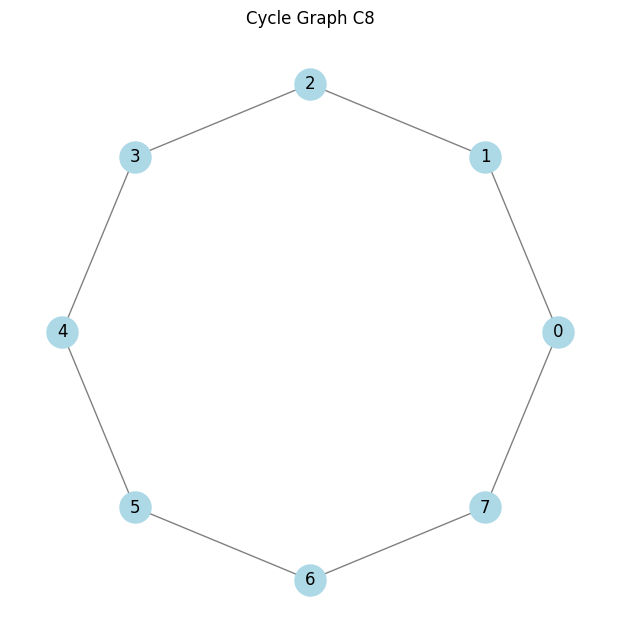

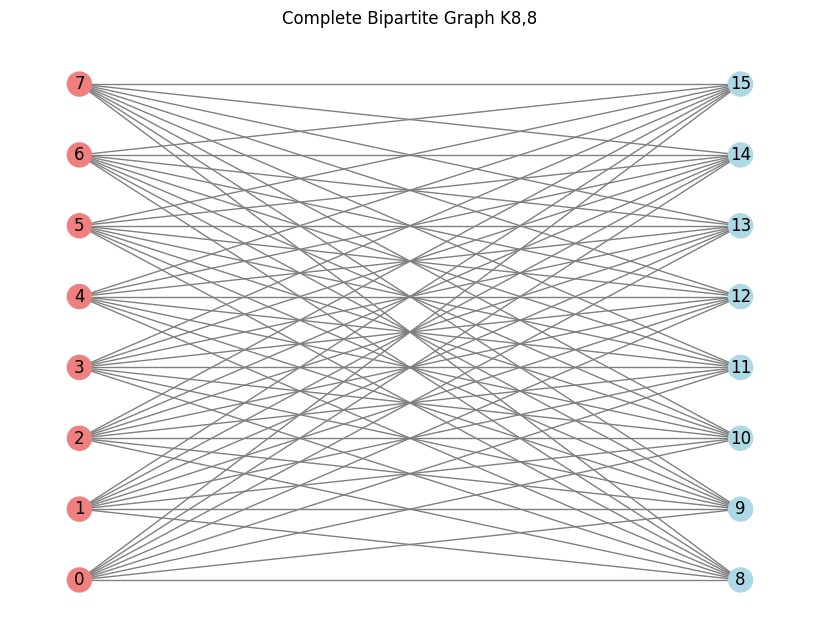

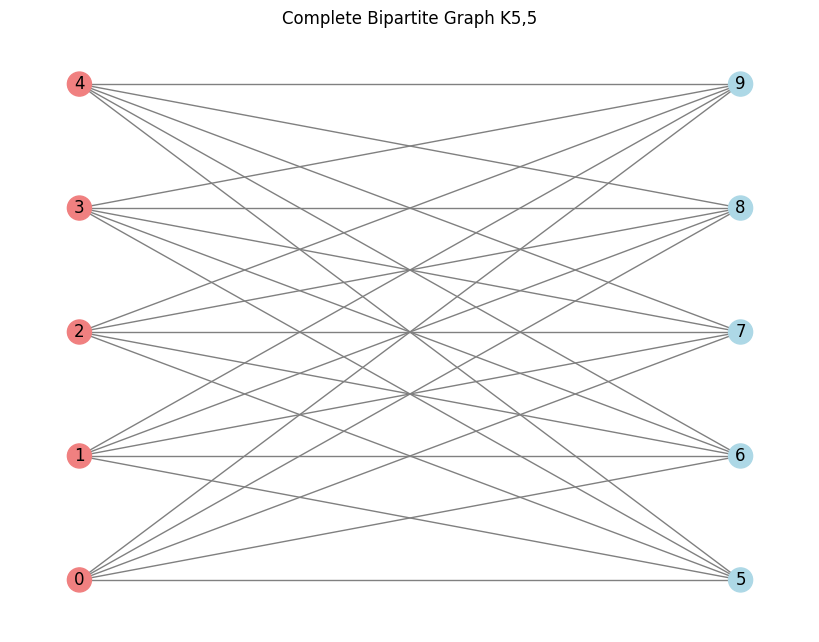

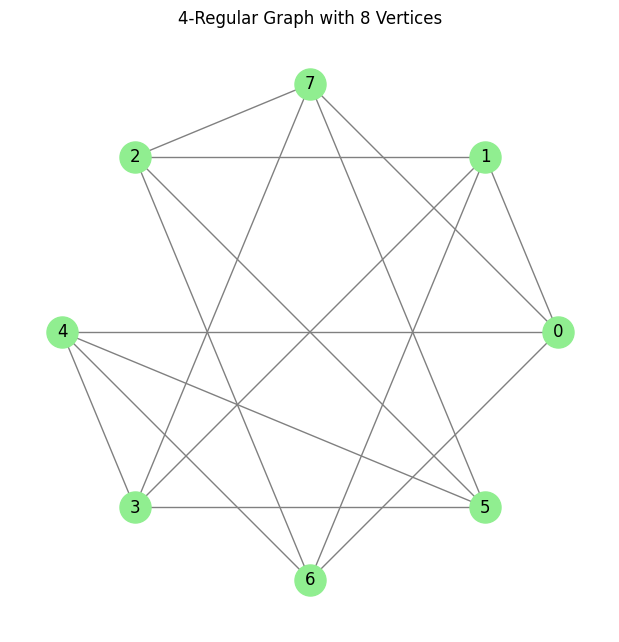

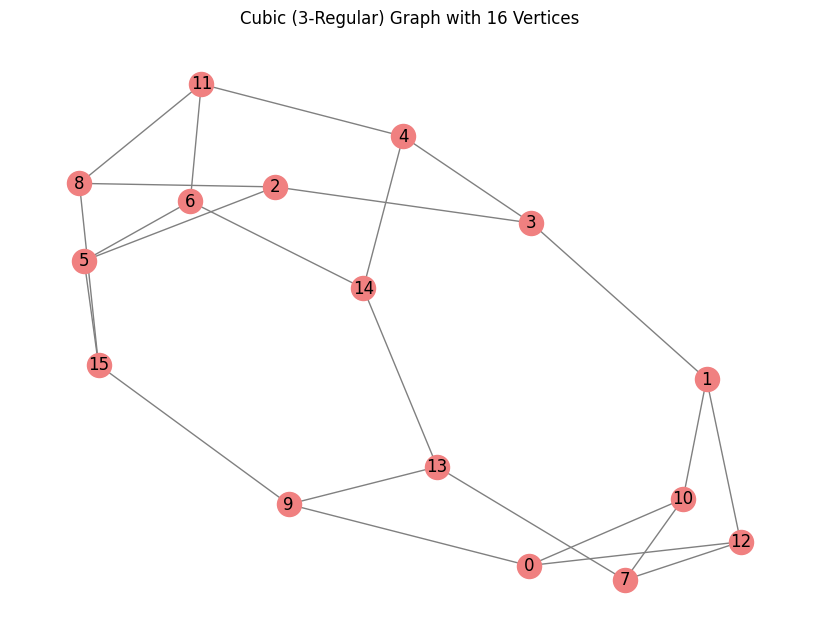

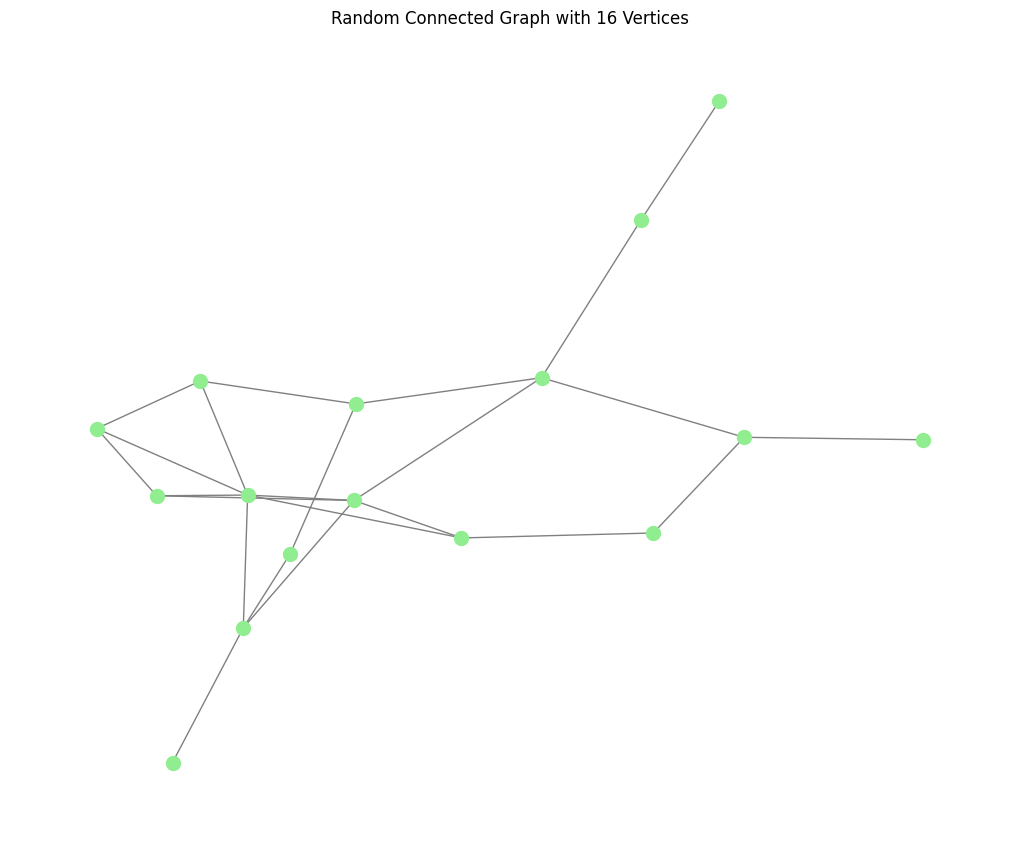

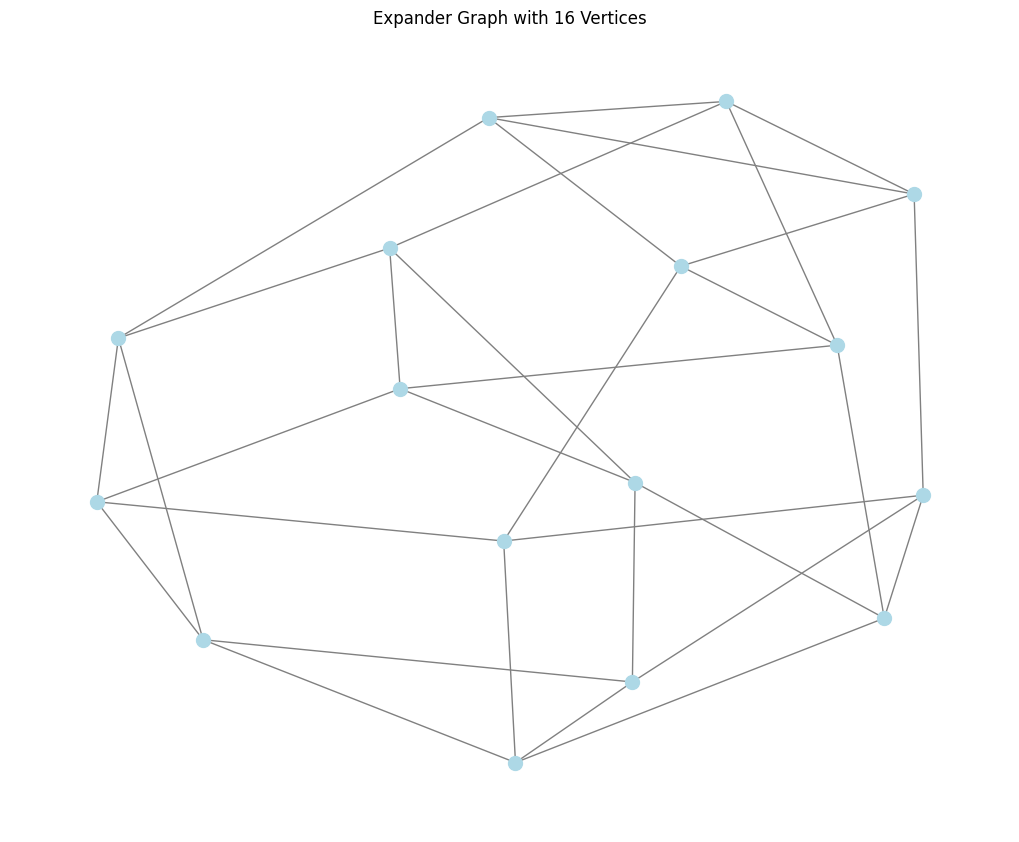

In [3]:
# Choose your favorite graph and build your winning ansatz!

graph1 = cycle_graph_c8() 
graph2 = complete_bipartite_graph_k88() 
graph3 = complete_bipartite_graph_k_nn(5) 
graph4 = regular_graph_4_8() 
graph5 = cubic_graph_3_16() 
graph6 = random_connected_graph_16(p=0.18)
graph7 = expander_graph_n(16) 
#graph8 = -> make your own cool graph

## Graph1
Balanced score: 0.79995

In [4]:
graph = graph1
graph

In [5]:
# Visualization will be performed in the cells below;

def build_ansatz(graph: nx.Graph, layers: int = 2) -> QuantumCircuit:
    
    num_qubits = graph.number_of_nodes()
    qc = QuantumCircuit(num_qubits)
    
    
    qc.h(range(num_qubits)) # Uniform superposition using Hadamard gates

    for layer in range(layers):
        theta_ry = ParameterVector(f"theta_ry_{layer}", num_qubits) # Apply single-qubit parameterized rotations
        theta_rz = ParameterVector(f"theta_rz_{layer}", num_qubits) # Apply single-qubit parameterized rotations
        for q in range(num_qubits): # Rotation gates
            qc.ry(theta_ry[q], q)
            qc.rz(theta_rz[q], q)

        phi = ParameterVector(f"phi_{layer}", len(graph.edges())) # Entangling layer using CZ or CRX instead of CXs
        for edge_idx, (u, v) in enumerate(graph.edges()):
            qc.cz(u, v)  # Controlled-Z instead of two CXs
            qc.rz(phi[edge_idx], v)  # Parameterized rotation on one qubit

        qc.barrier()

    return qc


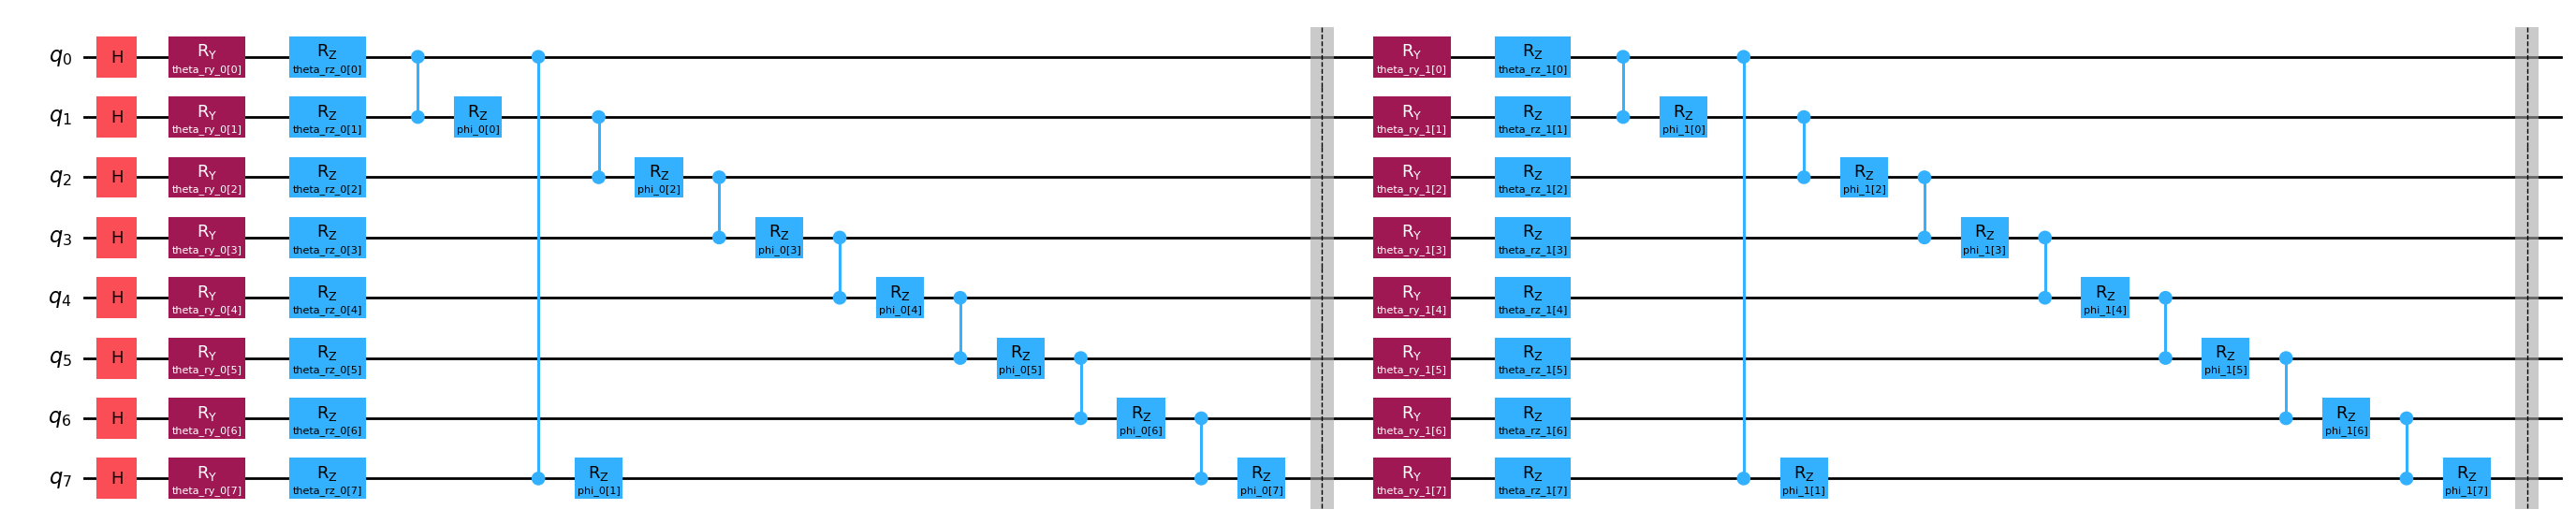

In [6]:
ansatz = build_ansatz(graph)
ansatz.draw("mpl", fold=-1)

In [7]:

def build_maxcut_hamiltonian(graph: nx.Graph) -> SparsePauliOp:
    """
    Build the MaxCut Hamiltonian for the given graph H = (|E|/2)*I - (1/2)*Σ_{(i,j)∈E}(Z_i Z_j)
    """
    num_qubits = len(graph.nodes)
    edges = list(graph.edges())
    num_edges = len(edges)

    pauli_terms = ["I"*num_qubits] # start with identity
    coeffs = [-num_edges / 2]

    for (u, v) in edges: # for each edge, add -(1/2)*Z_i Z_j
        z_term = ["I"] * num_qubits
        z_term[u] = "Z"
        z_term[v] = "Z"
        pauli_terms.append("".join(z_term))
        coeffs.append(0.5)

    # Balance part: (λ/4) * (N I + Σ_{i≠j} Z_i Z_j) -> We want nodes of graph subset to be balanced to num_qubits/2.
    # We want to sum nodes with index '1' and subtract it with num_qubits/2 and square it to see the positve squared difference.
    # This way, we can add the term to the original Hamiltonian for further optimization.

    lambda_balance = 1 # param
    pauli_terms.append("I" * num_qubits)
    coeffs.append(lambda_balance * num_qubits / 4)

    for i in range(num_qubits):
        for j in range(i + 1, num_qubits):
            zz_term = ["I"] * num_qubits
            zz_term[i] = "Z"
            zz_term[j] = "Z"
            pauli_terms.append("".join(zz_term))
            coeffs.append(lambda_balance / 4) # Z_i Z_j terms for all pairs of nodes
            
    return SparsePauliOp.from_list(list(zip(pauli_terms, coeffs)))


In [8]:
ham = build_maxcut_hamiltonian(graph)
ham

SparsePauliOp(['IIIIIIII', 'ZZIIIIII', 'ZIIIIIIZ', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIZZII', 'IIIIIZZI', 'IIIIIIZZ', 'IIIIIIII', 'ZZIIIIII', 'ZIZIIIII', 'ZIIZIIII', 'ZIIIZIII', 'ZIIIIZII', 'ZIIIIIZI', 'ZIIIIIIZ', 'IZZIIIII', 'IZIZIIII', 'IZIIZIII', 'IZIIIZII', 'IZIIIIZI', 'IZIIIIIZ', 'IIZZIIII', 'IIZIZIII', 'IIZIIZII', 'IIZIIIZI', 'IIZIIIIZ', 'IIIZZIII', 'IIIZIZII', 'IIIZIIZI', 'IIIZIIIZ', 'IIIIZZII', 'IIIIZIZI', 'IIIIZIIZ', 'IIIIIZZI', 'IIIIIZIZ', 'IIIIIIZZ'],
              coeffs=[-4.  +0.j,  0.5 +0.j,  0.5 +0.j,  0.5 +0.j,  0.5 +0.j,  0.5 +0.j,
  0.5 +0.j,  0.5 +0.j,  0.5 +0.j,  2.  +0.j,  0.25+0.j,  0.25+0.j,
  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
  0.25+0.j,  0.25+0.j])

In [9]:
def compute_cut_size(graph, bitstring):
    """
    Get the cut size of the partition of ``graph`` described by the given
    ``bitstring``.
    """
    cut_sz = 0
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_sz += 1
    return cut_sz

In [10]:
def get_ising_energies(
        operator: SparsePauliOp, 
        states: np.array
    ):
    """
    Get the energies of the given Ising ``operator`` that correspond to the
    given ``states``.
    """
    # Unroll Hamiltonian data into NumPy arrays
    paulis = np.array([list(ops) for ops, _ in operator.label_iter()]) != "I"
    coeffs = operator.coeffs.real
    
    # Vectorized energies computation
    energies = (-1) ** (states @ paulis.T) @ coeffs
    return energies

In [12]:
def expected_energy(
        hamiltonian: SparsePauliOp,
        measurements: np.array
):
    """
    Compute the expected energy of the given ``hamiltonian`` with respect to
    the observed ``measurement``.

    The latter is assumed to by a NumPy records array with fields ``states``
    --describing the observed bit-strings as an integer array-- and ``counts``,
    describing the corresponding observed frequency of each state.
    """
    energies = get_ising_energies(hamiltonian, measurements["states"])
    return np.dot(energies, measurements["counts"]) / measurements["counts"].sum()

In [13]:
def interpret_solution(graph, bitstring):
    """
    Visualize the given ``bitstring`` as a partition of the given ``graph``.
    """
    pos = nx.spring_layout(graph, seed=42)
    set_0 = [i for i, b in enumerate(bitstring) if b == '0']
    set_1 = [i for i, b in enumerate(bitstring) if b == '1']

    plt.figure(figsize=(4, 4))
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_0, node_color='blue', node_size=700)
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_1, node_color='red', node_size=700)

    cut_edges = []
    non_cut_edges = []
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_edges.append((u, v))
        else:
            non_cut_edges.append((u, v))

    nx.draw_networkx_edges(graph, pos=pos, edgelist=non_cut_edges, edge_color='gray', width=2)
    nx.draw_networkx_edges(graph, pos=pos, edgelist=cut_edges, edge_color='green', width=2, style='dashed')

    nx.draw_networkx_labels(graph, pos=pos, font_color='white', font_weight='bold')
    plt.axis('off')
    plt.show()

In [14]:
class QITEvolver:
    """
    A class to evolve a parametrized quantum state under the action of an Ising
    Hamiltonian according to the variational Quantum Imaginary Time Evolution
    (QITE) principle described in IonQ's latest joint paper with ORNL.
    """
    def __init__(self, hamiltonian: SparsePauliOp, ansatz: QuantumCircuit):
        self.hamiltonian = hamiltonian
        self.ansatz = ansatz

        # Define some constants
        self.backend = AerSimulator()
        self.num_shots = 10000
        self.energies, self.param_vals, self.runtime = list(), list(), list()

    def evolve(self, num_steps: int, lr: float = 0.4, verbose: bool = True):
        """
        Evolve the variational quantum state encoded by ``self.ansatz`` under
        the action of ``self.hamiltonian`` according to varQITE.
        """
        curr_params = np.zeros(self.ansatz.num_parameters)
        for k in range(num_steps):
            # Get circuits and measure on backend
            iter_qc = self.get_iteration_circuits(curr_params)
            job = self.backend.run(iter_qc, shots=self.num_shots)
            q0 = time.time()
            measurements = job.result().get_counts()
            quantum_exec_time = time.time() - q0

            # Update parameters-- set up defining ODE and step forward
            Gmat, dvec, curr_energy = self.get_defining_ode(measurements)
            dcurr_params = np.linalg.lstsq(Gmat, dvec, rcond=1e-2)[0]
            curr_params += lr * dcurr_params

            # Progress checkpoint!
            if verbose:
                self.print_status(measurements)
            self.energies.append(curr_energy)
            self.param_vals.append(curr_params.copy())
            self.runtime.append(quantum_exec_time)

    def get_defining_ode(self, measurements: List[dict[str, int]]):
        """
        Construct the dynamics matrix and load vector defining the varQITE
        iteration.
        """
        # Load sampled bitstrings and corresponding frequencies into NumPy arrays
        dtype = np.dtype([("states", int, (self.ansatz.num_qubits,)), ("counts", "f")])
        measurements = [np.fromiter(map(lambda kv: (list(kv[0]), kv[1]), res.items()), dtype) for res in measurements]

        # Set up the dynamics matrix by computing the gradient of each Pauli word
        # with respect to each parameter in the ansatz using the parameter-shift rule
        pauli_terms = [SparsePauliOp(op) for op, _ in self.hamiltonian.label_iter() if set(op) != set("I")]
        Gmat = np.zeros((len(pauli_terms), self.ansatz.num_parameters))
        for i, pauli_word in enumerate(pauli_terms):
            for j, jth_pair in enumerate(zip(measurements[1::2], measurements[2::2])):
                for pm, pm_shift in enumerate(jth_pair):
                    Gmat[i, j] += (-1)**pm * expected_energy(pauli_word, pm_shift)
        
        # Set up the load vector
        curr_energy = expected_energy(self.hamiltonian, measurements[0])
        dvec = np.zeros(len(pauli_terms))
        for i, pauli_word in enumerate(pauli_terms):
            rhs_op_energies = get_ising_energies(pauli_word, measurements[0]["states"])
            rhs_op_energies *= get_ising_energies(self.hamiltonian, measurements[0]["states"]) - curr_energy
            dvec[i] = -np.dot(rhs_op_energies, measurements[0]["counts"]) / self.num_shots
        return Gmat, dvec, curr_energy

    def get_iteration_circuits(self, curr_params: np.array):
        """
        Get the bound circuits that need to be evaluated to step forward
        according to QITE.
        """
        # Use this circuit to estimate your Hamiltonian's expected value
        circuits = [self.ansatz.assign_parameters(curr_params)]

        # Use these circuits to compute gradients
        for k in np.arange(curr_params.shape[0]):
            for j in range(2):
                pm_shift = curr_params.copy()
                pm_shift[k] += (-1)**j * np.pi/2
                circuits += [self.ansatz.assign_parameters(pm_shift)]
        
        # Add measurement gates and return
        [qc.measure_all() for qc in circuits]
        return circuits
    
    def plot_convergence(self):
        """
        Plot the convergence of the expected value of ``self.hamiltonian`` with
        respect to the (imaginary) time steps.
        """
        plt.plot(self.energies)
        plt.xlabel("(Imaginary) Time step")
        plt.ylabel("Hamiltonian energy")
        plt.title("Convergence of the expected energy")

    def print_status(self, measurements):
        """
        Print summary statistics describing a QITE run.
        """
        stats = pd.DataFrame({
            "curr_energy": self.energies,
            "num_circuits": [len(measurements)] * len(self.energies),
            "quantum_exec_time": self.runtime 
        })
        stats.index.name = "step"
        display.clear_output(wait=True)
        display.display(stats)

,curr_energy,num_circuits,quantum_exec_time
step,,,
0,-1.96635,97,1.929316
1,-2.43240,97,1.981922
2,-2.70060,97,2.867180
3,-3.41705,97,2.943563
4,-2.54500,97,3.000209
5,-3.11015,97,2.933186
6,-3.59020,97,2.916783
7,-2.83405,97,2.901950
8,-3.15290,97,2.980991


CPU times: total: 13min 16s
Wall time: 2min 34s


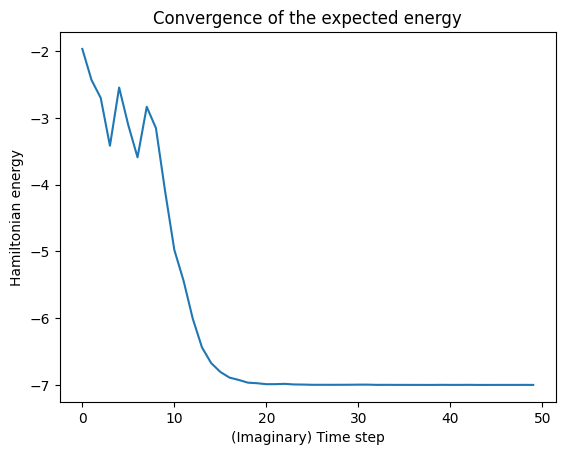

In [15]:
%%time

# Set up your QITEvolver and evolve!
qit_evolver = QITEvolver(ham, ansatz)
qit_evolver.evolve(num_steps=50, lr=0.5, verbose=True) # lr was 0.5

# Visualize your results!
qit_evolver.plot_convergence()

In [16]:
from qiskit_aer import AerSimulator

shots = 100_000

# Sample your optimized quantum state using Aer
backend = AerSimulator()
optimized_state = ansatz.assign_parameters(qit_evolver.param_vals[-1])
optimized_state.measure_all()
counts = backend.run(optimized_state, shots=shots).result().get_counts()

# Find the sampled bitstring with the largest cut value
cut_vals = sorted(((bs, compute_cut_size(graph, bs)) for bs in counts), key=lambda t: t[1])
best_bs = cut_vals[-1][0]

# Now find the most likely MaxCut solution as sampled from your optimized state
# We'll leave this part up to you!!!
most_likely_soln = ""

print(counts)

{'01010101': 99994, '01010100': 1, '01100101': 1, '00010101': 1, '01001101': 1, '01010110': 2}


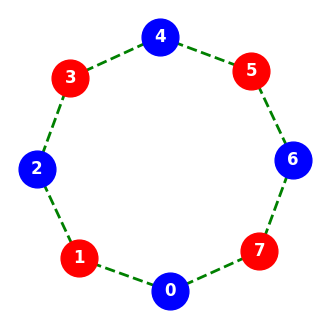

Cut value: 8
Graph with 8 nodes and 8 edges 01010101


In [17]:
interpret_solution(graph, best_bs)
print("Cut value: "+str(compute_cut_size(graph, best_bs)))
print(graph, best_bs)

In [18]:
%%time
# Brute-force approach with conditional checks

verbose = False

G = graph
n = len(G.nodes())
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = 1.0
if verbose:
    print(w)

best_cost_brute = 0
best_cost_balanced = 0
best_cost_connected = 0

for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]

    # Create subgraphs based on the partition
    subgraph0 = G.subgraph([i for i, val in enumerate(x) if val == 0])
    subgraph1 = G.subgraph([i for i, val in enumerate(x) if val == 1])

    bs = "".join(str(i) for i in x)
    
    # Check if subgraphs are not empty
    if len(subgraph0.nodes) > 0 and len(subgraph1.nodes) > 0:
        cost = 0
        for i in range(n):
            for j in range(n):
                cost = cost + w[i, j] * x[i] * (1 - x[j])
        if best_cost_brute < cost:
            best_cost_brute = cost
            xbest_brute = x
            XS_brut = []
        if best_cost_brute == cost:
            XS_brut.append(bs)

        outstr = "case = " + str(x) + " cost = " + str(cost)

        if (len(subgraph1.nodes)-len(subgraph0.nodes))**2 <= 1:
            outstr += " balanced"
            if best_cost_balanced < cost:
                best_cost_balanced = cost
                xbest_balanced = x
                XS_balanced = []
            if best_cost_balanced == cost:
                XS_balanced.append(bs)

        if nx.is_connected(subgraph0) and nx.is_connected(subgraph1):
            outstr += " connected"
            if best_cost_connected < cost:
                best_cost_connected = cost
                xbest_connected = x
                XS_connected = []
            if best_cost_connected == cost:
                XS_connected.append(bs)
        if verbose:
            print(outstr)


CPU times: total: 15.6 ms
Wall time: 17.6 ms


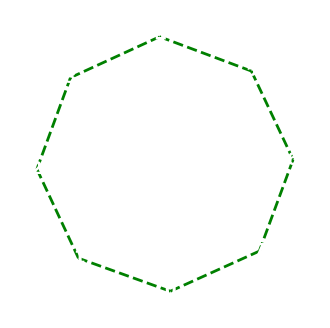

Graph with 8 nodes and 8 edges [1, 0, 1, 0, 1, 0, 1, 0]

Best solution = [1, 0, 1, 0, 1, 0, 1, 0] cost = 8.0
['10101010', '01010101']


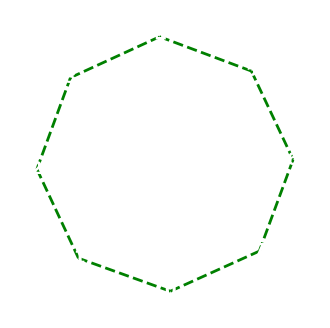

Graph with 8 nodes and 8 edges [1, 0, 1, 0, 1, 0, 1, 0]

Best balanced = [1, 0, 1, 0, 1, 0, 1, 0] cost = 8.0
['10101010', '01010101']


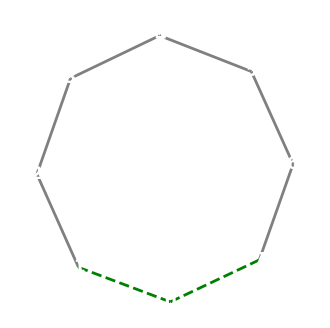

Graph with 8 nodes and 8 edges [1, 0, 0, 0, 0, 0, 0, 0]

Best connected = [1, 0, 0, 0, 0, 0, 0, 0] cost = 2.0
['10000000', '01000000', '11000000', '00100000', '01100000', '11100000', '00010000', '00110000', '01110000', '11110000', '00001000', '00011000', '00111000', '01111000', '11111000', '00000100', '00001100', '00011100', '00111100', '01111100', '11111100', '00000010', '00000110', '00001110', '00011110', '00111110', '01111110', '11111110', '00000001', '10000001', '11000001', '11100001', '11110001', '11111001', '11111101', '00000011', '10000011', '11000011', '11100011', '11110011', '11111011', '00000111', '10000111', '11000111', '11100111', '11110111', '00001111', '10001111', '11001111', '11101111', '00011111', '10011111', '11011111', '00111111', '10111111', '01111111']


In [19]:
# This is classical brute force solver results:
interpret_solution(graph, xbest_brute)
print(graph, xbest_brute)
print("\nBest solution = " + str(xbest_brute) + " cost = " + str(best_cost_brute))
print(XS_brut)

interpret_solution(graph, xbest_balanced)
print(graph, xbest_balanced)
print("\nBest balanced = " + str(xbest_balanced) + " cost = " + str(best_cost_balanced))
print(XS_balanced)

interpret_solution(graph, xbest_connected)
print(graph, xbest_connected)
print("\nBest connected = " + str(xbest_connected) + " cost = " + str(best_cost_connected))
print(XS_connected)
plt.show()

In [20]:
# And this is how we calculate the shots counted toward scores for each class of the problems

sum_counts = 0
for bs in counts:
    if bs in XS_brut:
        sum_counts += counts[bs]

print(f"Pure max-cut: {sum_counts} out of {shots}")

sum_balanced_counts = 0
for bs in counts:
    if bs in XS_balanced:
        sum_balanced_counts += counts[bs]

print(f"Balanced max-cut: {sum_balanced_counts} out of {shots}")

sum_connected_counts = 0
for bs in counts:
    if bs in XS_connected:
        sum_connected_counts += counts[bs]

print(f"Connected max-cut: {sum_connected_counts} out of {shots}")

Pure max-cut: 99994 out of 100000
Balanced max-cut: 99994 out of 100000
Connected max-cut: 0 out of 100000


In [21]:
def final_score(graph, XS_brut,counts,shots,ansatz,challenge):

    if(challenge=='base'):
        sum_counts = 0
        for bs in counts:
            if bs in XS_brut:
                sum_counts += counts[bs]
    elif(challenge=='balanced'):
        sum_balanced_counts = 0
        for bs in counts:
            if bs in XS_balanced:
                sum_balanced_counts += counts[bs]        
        sum_counts = sum_balanced_counts
    elif(challenge=='connected'):
        sum_connected_counts = 0
        for bs in counts:
            if bs in XS_connected:
                sum_connected_counts += counts[bs]
        sum_counts = sum_connected_counts

    
    transpiled_ansatz = transpile(ansatz, basis_gates = ['cx','rz','sx','x'])
    cx_count = transpiled_ansatz.count_ops()['cx']
    score = (4*2*graph.number_of_edges())/(4*2*graph.number_of_edges() + cx_count) * sum_counts/shots

    return np.round(score,5)

In [22]:
print("Base score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'base')))
print("Balanced score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'balanced')))
print("Connected score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'connected')))

Base score: 0.79995
Balanced score: 0.79995
Connected score: 0.0


## Graph2
Balanced score: 0.79882

In [ ]:
graph = graph2
graph

In [ ]:
# Visualization will be performed in the cells below;

def build_ansatz(graph: nx.Graph, layers: int = 2) -> QuantumCircuit:
    
    num_qubits = graph.number_of_nodes()
    qc = QuantumCircuit(num_qubits)
    
    
    qc.h(range(num_qubits)) # Uniform superposition using Hadamard gates

    for layer in range(layers):
        theta_ry = ParameterVector(f"theta_ry_{layer}", num_qubits) # Apply single-qubit parameterized rotations
        theta_rz = ParameterVector(f"theta_rz_{layer}", num_qubits) # Apply single-qubit parameterized rotations
        for q in range(num_qubits): # Rotation gates
            qc.ry(theta_ry[q], q)
            qc.rz(theta_rz[q], q)

        phi = ParameterVector(f"phi_{layer}", len(graph.edges())) # Entangling layer using CZ or CRX instead of CXs
        for edge_idx, (u, v) in enumerate(graph.edges()):
            qc.cz(u, v)  # Controlled-Z instead of two CXs
            qc.rz(phi[edge_idx], v)  # Parameterized rotation on one qubit

        qc.barrier()

    return qc


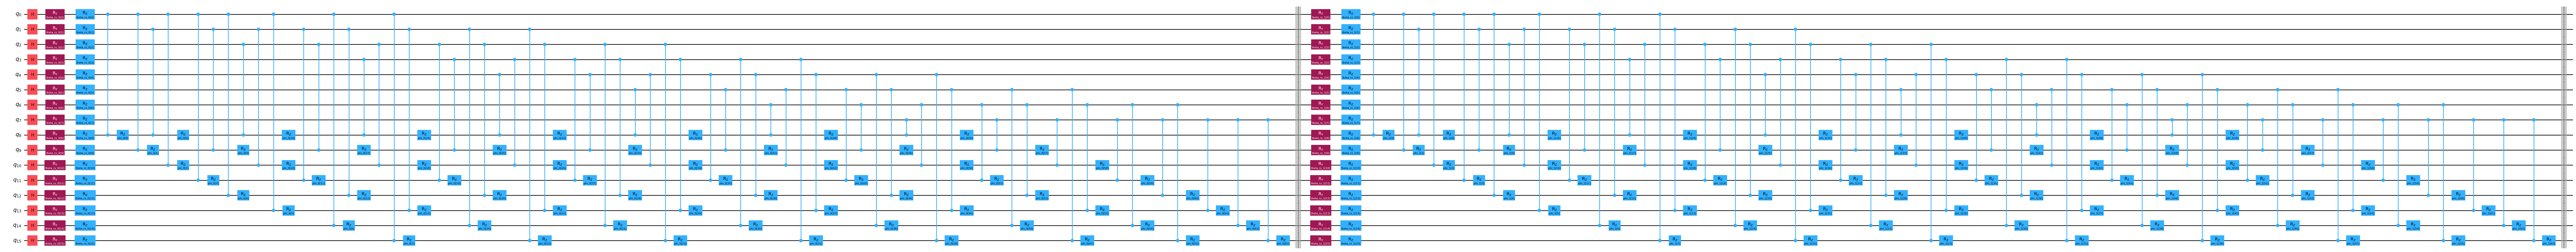

In [ ]:
ansatz = build_ansatz(graph)
ansatz.draw("mpl", fold=-1)

In [ ]:

def build_maxcut_hamiltonian(graph: nx.Graph) -> SparsePauliOp:
    """
    Build the MaxCut Hamiltonian for the given graph H = (|E|/2)*I - (1/2)*Σ_{(i,j)∈E}(Z_i Z_j)
    """
    num_qubits = len(graph.nodes)
    edges = list(graph.edges())
    num_edges = len(edges)

    pauli_terms = ["I"*num_qubits] # start with identity
    coeffs = [-num_edges / 2]

    for (u, v) in edges: # for each edge, add -(1/2)*Z_i Z_j
        z_term = ["I"] * num_qubits
        z_term[u] = "Z"
        z_term[v] = "Z"
        pauli_terms.append("".join(z_term))
        coeffs.append(0.5)

    # Balance part: (λ/4) * (N I + Σ_{i≠j} Z_i Z_j) -> We want nodes of graph subset to be balanced to num_qubits/2.
    # We want to sum nodes with index '1' and subtract it with num_qubits/2 and square it to see the positve squared difference.
    # This way, we can add the term to the original Hamiltonian for further optimization.

    lambda_balance = 1 # param
    pauli_terms.append("I" * num_qubits)
    coeffs.append(lambda_balance * num_qubits / 4)

    for i in range(num_qubits):
        for j in range(i + 1, num_qubits):
            zz_term = ["I"] * num_qubits
            zz_term[i] = "Z"
            zz_term[j] = "Z"
            pauli_terms.append("".join(zz_term))
            coeffs.append(lambda_balance / 4) # Z_i Z_j terms for all pairs of nodes
            
    return SparsePauliOp.from_list(list(zip(pauli_terms, coeffs)))


Let's keep this function contained within its own cell, as you might need to adapt it for various max-cut problem types later.

In [ ]:
ham = build_maxcut_hamiltonian(graph)
ham

SparsePauliOp(['IIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIII', 'ZIIIIIIIIZIIIIII', 'ZIIIIIIIIIZIIIII', 'ZIIIIIIIIIIZIIII', 'ZIIIIIIIIIIIZIII', 'ZIIIIIIIIIIIIZII', 'ZIIIIIIIIIIIIIZI', 'ZIIIIIIIIIIIIIIZ', 'IZIIIIIIZIIIIIII', 'IZIIIIIIIZIIIIII', 'IZIIIIIIIIZIIIII', 'IZIIIIIIIIIZIIII', 'IZIIIIIIIIIIZIII', 'IZIIIIIIIIIIIZII', 'IZIIIIIIIIIIIIZI', 'IZIIIIIIIIIIIIIZ', 'IIZIIIIIZIIIIIII', 'IIZIIIIIIZIIIIII', 'IIZIIIIIIIZIIIII', 'IIZIIIIIIIIZIIII', 'IIZIIIIIIIIIZIII', 'IIZIIIIIIIIIIZII', 'IIZIIIIIIIIIIIZI', 'IIZIIIIIIIIIIIIZ', 'IIIZIIIIZIIIIIII', 'IIIZIIIIIZIIIIII', 'IIIZIIIIIIZIIIII', 'IIIZIIIIIIIZIIII', 'IIIZIIIIIIIIZIII', 'IIIZIIIIIIIIIZII', 'IIIZIIIIIIIIIIZI', 'IIIZIIIIIIIIIIIZ', 'IIIIZIIIZIIIIIII', 'IIIIZIIIIZIIIIII', 'IIIIZIIIIIZIIIII', 'IIIIZIIIIIIZIIII', 'IIIIZIIIIIIIZIII', 'IIIIZIIIIIIIIZII', 'IIIIZIIIIIIIIIZI', 'IIIIZIIIIIIIIIIZ', 'IIIIIZIIZIIIIIII', 'IIIIIZIIIZIIIIII', 'IIIIIZIIIIZIIIII', 'IIIIIZIIIIIZIIII', 'IIIIIZIIIIIIZIII', 'IIIIIZIIIIIIIZII', 'IIIIIZIIIIIIIIZI', 'IIIIIZIIIIIIIIIZ', 'IIII

In [ ]:
def compute_cut_size(graph, bitstring):
    """
    Get the cut size of the partition of ``graph`` described by the given
    ``bitstring``.
    """
    cut_sz = 0
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_sz += 1
    return cut_sz

In [ ]:
def get_ising_energies(
        operator: SparsePauliOp, 
        states: np.array
    ):
    """
    Get the energies of the given Ising ``operator`` that correspond to the
    given ``states``.
    """
    # Unroll Hamiltonian data into NumPy arrays
    paulis = np.array([list(ops) for ops, _ in operator.label_iter()]) != "I"
    coeffs = operator.coeffs.real
    
    # Vectorized energies computation
    energies = (-1) ** (states @ paulis.T) @ coeffs
    return energies

In [ ]:
def expected_energy(
        hamiltonian: SparsePauliOp,
        measurements: np.array
):
    """
    Compute the expected energy of the given ``hamiltonian`` with respect to
    the observed ``measurement``.

    The latter is assumed to by a NumPy records array with fields ``states``
    --describing the observed bit-strings as an integer array-- and ``counts``,
    describing the corresponding observed frequency of each state.
    """
    energies = get_ising_energies(hamiltonian, measurements["states"])
    return np.dot(energies, measurements["counts"]) / measurements["counts"].sum()

In [ ]:
def interpret_solution(graph, bitstring):
    """
    Visualize the given ``bitstring`` as a partition of the given ``graph``.
    """
    pos = nx.spring_layout(graph, seed=42)
    set_0 = [i for i, b in enumerate(bitstring) if b == '0']
    set_1 = [i for i, b in enumerate(bitstring) if b == '1']

    plt.figure(figsize=(4, 4))
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_0, node_color='blue', node_size=700)
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_1, node_color='red', node_size=700)

    cut_edges = []
    non_cut_edges = []
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_edges.append((u, v))
        else:
            non_cut_edges.append((u, v))

    nx.draw_networkx_edges(graph, pos=pos, edgelist=non_cut_edges, edge_color='gray', width=2)
    nx.draw_networkx_edges(graph, pos=pos, edgelist=cut_edges, edge_color='green', width=2, style='dashed')

    nx.draw_networkx_labels(graph, pos=pos, font_color='white', font_weight='bold')
    plt.axis('off')
    plt.show()

In [ ]:
class QITEvolver:
    """
    A class to evolve a parametrized quantum state under the action of an Ising
    Hamiltonian according to the variational Quantum Imaginary Time Evolution
    (QITE) principle described in IonQ's latest joint paper with ORNL.
    """
    def __init__(self, hamiltonian: SparsePauliOp, ansatz: QuantumCircuit):
        self.hamiltonian = hamiltonian
        self.ansatz = ansatz

        # Define some constants
        self.backend = AerSimulator()
        self.num_shots = 10000
        self.energies, self.param_vals, self.runtime = list(), list(), list()

    def evolve(self, num_steps: int, lr: float = 0.4, verbose: bool = True):
        """
        Evolve the variational quantum state encoded by ``self.ansatz`` under
        the action of ``self.hamiltonian`` according to varQITE.
        """
        curr_params = np.zeros(self.ansatz.num_parameters)
        for k in range(num_steps):
            # Get circuits and measure on backend
            iter_qc = self.get_iteration_circuits(curr_params)
            job = self.backend.run(iter_qc, shots=self.num_shots)
            q0 = time.time()
            measurements = job.result().get_counts()
            quantum_exec_time = time.time() - q0

            # Update parameters-- set up defining ODE and step forward
            Gmat, dvec, curr_energy = self.get_defining_ode(measurements)
            dcurr_params = np.linalg.lstsq(Gmat, dvec, rcond=1e-2)[0]
            curr_params += lr * dcurr_params

            # Progress checkpoint!
            if verbose:
                self.print_status(measurements)
            self.energies.append(curr_energy)
            self.param_vals.append(curr_params.copy())
            self.runtime.append(quantum_exec_time)

    def get_defining_ode(self, measurements: List[dict[str, int]]):
        """
        Construct the dynamics matrix and load vector defining the varQITE
        iteration.
        """
        # Load sampled bitstrings and corresponding frequencies into NumPy arrays
        dtype = np.dtype([("states", int, (self.ansatz.num_qubits,)), ("counts", "f")])
        measurements = [np.fromiter(map(lambda kv: (list(kv[0]), kv[1]), res.items()), dtype) for res in measurements]

        # Set up the dynamics matrix by computing the gradient of each Pauli word
        # with respect to each parameter in the ansatz using the parameter-shift rule
        pauli_terms = [SparsePauliOp(op) for op, _ in self.hamiltonian.label_iter() if set(op) != set("I")]
        Gmat = np.zeros((len(pauli_terms), self.ansatz.num_parameters))
        for i, pauli_word in enumerate(pauli_terms):
            for j, jth_pair in enumerate(zip(measurements[1::2], measurements[2::2])):
                for pm, pm_shift in enumerate(jth_pair):
                    Gmat[i, j] += (-1)**pm * expected_energy(pauli_word, pm_shift)
        
        # Set up the load vector
        curr_energy = expected_energy(self.hamiltonian, measurements[0])
        dvec = np.zeros(len(pauli_terms))
        for i, pauli_word in enumerate(pauli_terms):
            rhs_op_energies = get_ising_energies(pauli_word, measurements[0]["states"])
            rhs_op_energies *= get_ising_energies(self.hamiltonian, measurements[0]["states"]) - curr_energy
            dvec[i] = -np.dot(rhs_op_energies, measurements[0]["counts"]) / self.num_shots
        return Gmat, dvec, curr_energy

    def get_iteration_circuits(self, curr_params: np.array):
        """
        Get the bound circuits that need to be evaluated to step forward
        according to QITE.
        """
        # Use this circuit to estimate your Hamiltonian's expected value
        circuits = [self.ansatz.assign_parameters(curr_params)]

        # Use these circuits to compute gradients
        for k in np.arange(curr_params.shape[0]):
            for j in range(2):
                pm_shift = curr_params.copy()
                pm_shift[k] += (-1)**j * np.pi/2
                circuits += [self.ansatz.assign_parameters(pm_shift)]
        
        # Add measurement gates and return
        [qc.measure_all() for qc in circuits]
        return circuits
    
    def plot_convergence(self):
        """
        Plot the convergence of the expected value of ``self.hamiltonian`` with
        respect to the (imaginary) time steps.
        """
        plt.plot(self.energies)
        plt.xlabel("(Imaginary) Time step")
        plt.ylabel("Hamiltonian energy")
        plt.title("Convergence of the expected energy")

    def print_status(self, measurements):
        """
        Print summary statistics describing a QITE run.
        """
        stats = pd.DataFrame({
            "curr_energy": self.energies,
            "num_circuits": [len(measurements)] * len(self.energies),
            "quantum_exec_time": self.runtime 
        })
        stats.index.name = "step"
        display.clear_output(wait=True)
        display.display(stats)

,curr_energy,num_circuits,quantum_exec_time
step,,,
0,-28.07535,385,23.380039
1,-28.12200,385,20.512110
2,-28.13875,385,21.932423
3,-27.44195,385,22.984721
4,-28.53885,385,24.049492
5,-29.59935,385,22.568092
6,-33.66370,385,21.362879
7,-37.67435,385,20.700831
8,-49.28245,385,21.516178


CPU times: total: 1h 41min 21s
Wall time: 25min 9s


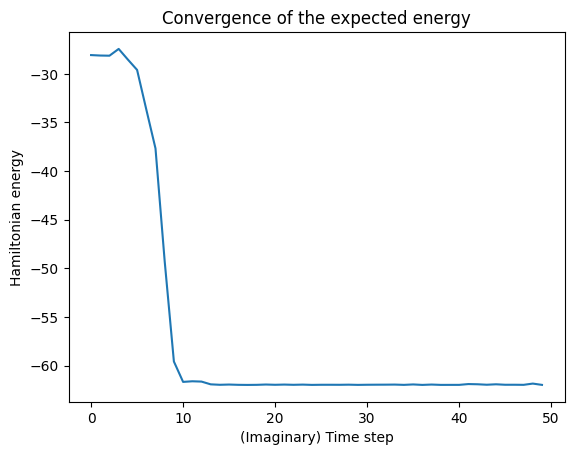

In [ ]:
%%time

# Set up your QITEvolver and evolve!
qit_evolver = QITEvolver(ham, ansatz)
qit_evolver.evolve(num_steps=50, lr=0.5, verbose=True) # lr was 0.5

# Visualize your results!
qit_evolver.plot_convergence()

In [ ]:
from qiskit_aer import AerSimulator

shots = 100_000

# Sample your optimized quantum state using Aer
backend = AerSimulator()
optimized_state = ansatz.assign_parameters(qit_evolver.param_vals[-1])
optimized_state.measure_all()
counts = backend.run(optimized_state, shots=shots).result().get_counts()

# Find the sampled bitstring with the largest cut value
cut_vals = sorted(((bs, compute_cut_size(graph, bs)) for bs in counts), key=lambda t: t[1])
best_bs = cut_vals[-1][0]

# Now find the most likely MaxCut solution as sampled from your optimized state
# We'll leave this part up to you!!!
most_likely_soln = ""

print(counts)

{'1111111100001000': 9, '1111111100000000': 99853, '1111111100010000': 82, '1111111000000000': 18, '1111110101000000': 1, '1111011100000000': 10, '1111110100000000': 2, '1111111100100000': 2, '1111111100000001': 2, '1111111101000000': 3, '1111111100000010': 4, '1011111100000000': 3, '1101111100000000': 6, '1111110100010000': 1, '0111111100000000': 4}


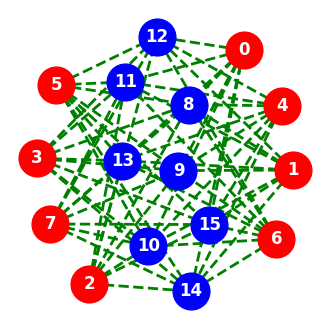

Cut value: 64
Graph named 'complete_bipartite_graph(8, 8)' with 16 nodes and 64 edges 1111111100000000


In [ ]:
interpret_solution(graph, best_bs)
print("Cut value: "+str(compute_cut_size(graph, best_bs)))
print(graph, best_bs)

In [ ]:
%%time
# Brute-force approach with conditional checks

verbose = False

G = graph
n = len(G.nodes())
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = 1.0
if verbose:
    print(w)

best_cost_brute = 0
best_cost_balanced = 0
best_cost_connected = 0

for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]

    # Create subgraphs based on the partition
    subgraph0 = G.subgraph([i for i, val in enumerate(x) if val == 0])
    subgraph1 = G.subgraph([i for i, val in enumerate(x) if val == 1])

    bs = "".join(str(i) for i in x)
    
    # Check if subgraphs are not empty
    if len(subgraph0.nodes) > 0 and len(subgraph1.nodes) > 0:
        cost = 0
        for i in range(n):
            for j in range(n):
                cost = cost + w[i, j] * x[i] * (1 - x[j])
        if best_cost_brute < cost:
            best_cost_brute = cost
            xbest_brute = x
            XS_brut = []
        if best_cost_brute == cost:
            XS_brut.append(bs)

        outstr = "case = " + str(x) + " cost = " + str(cost)

        if (len(subgraph1.nodes)-len(subgraph0.nodes))**2 <= 1:
            outstr += " balanced"
            if best_cost_balanced < cost:
                best_cost_balanced = cost
                xbest_balanced = x
                XS_balanced = []
            if best_cost_balanced == cost:
                XS_balanced.append(bs)

        if nx.is_connected(subgraph0) and nx.is_connected(subgraph1):
            outstr += " connected"
            if best_cost_connected < cost:
                best_cost_connected = cost
                xbest_connected = x
                XS_connected = []
            if best_cost_connected == cost:
                XS_connected.append(bs)
        if verbose:
            print(outstr)


CPU times: total: 16.2 s
Wall time: 16.3 s


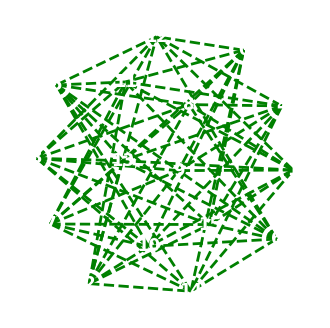

Graph named 'complete_bipartite_graph(8, 8)' with 16 nodes and 64 edges [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

Best solution = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 64.0
['1111111100000000', '0000000011111111']


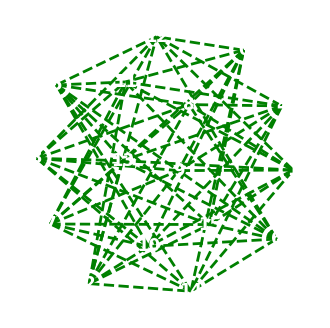

Graph named 'complete_bipartite_graph(8, 8)' with 16 nodes and 64 edges [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

Best balanced = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 64.0
['1111111100000000', '0000000011111111']


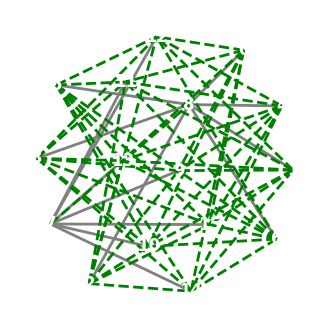

Graph named 'complete_bipartite_graph(8, 8)' with 16 nodes and 64 edges [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Best connected = [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0] cost = 50.0
['1111111010000000', '1111110110000000', '1111101110000000', '1111011110000000', '1110111110000000', '1101111110000000', '1011111110000000', '0111111110000000', '1111111001000000', '1111110101000000', '1111101101000000', '1111011101000000', '1110111101000000', '1101111101000000', '1011111101000000', '0111111101000000', '1111111000100000', '1111110100100000', '1111101100100000', '1111011100100000', '1110111100100000', '1101111100100000', '1011111100100000', '0111111100100000', '1111111000010000', '1111110100010000', '1111101100010000', '1111011100010000', '1110111100010000', '1101111100010000', '1011111100010000', '0111111100010000', '1111111000001000', '1111110100001000', '1111101100001000', '1111011100001000', '1110111100001000', '1101111100001000', '1011111100001000', '0111111100001000',

In [ ]:
# This is classical brute force solver results:
interpret_solution(graph, xbest_brute)
print(graph, xbest_brute)
print("\nBest solution = " + str(xbest_brute) + " cost = " + str(best_cost_brute))
print(XS_brut)

interpret_solution(graph, xbest_balanced)
print(graph, xbest_balanced)
print("\nBest balanced = " + str(xbest_balanced) + " cost = " + str(best_cost_balanced))
print(XS_balanced)

interpret_solution(graph, xbest_connected)
print(graph, xbest_connected)
print("\nBest connected = " + str(xbest_connected) + " cost = " + str(best_cost_connected))
print(XS_connected)
plt.show()

In [ ]:
# And this is how we calculate the shots counted toward scores for each class of the problems

sum_counts = 0
for bs in counts:
    if bs in XS_brut:
        sum_counts += counts[bs]

print(f"Pure max-cut: {sum_counts} out of {shots}")

sum_balanced_counts = 0
for bs in counts:
    if bs in XS_balanced:
        sum_balanced_counts += counts[bs]

print(f"Balanced max-cut: {sum_balanced_counts} out of {shots}")

sum_connected_counts = 0
for bs in counts:
    if bs in XS_connected:
        sum_connected_counts += counts[bs]

print(f"Connected max-cut: {sum_connected_counts} out of {shots}")

Pure max-cut: 99853 out of 100000
Balanced max-cut: 99853 out of 100000
Connected max-cut: 2 out of 100000


In [ ]:
def final_score(graph, XS_brut,counts,shots,ansatz,challenge):

    if(challenge=='base'):
        sum_counts = 0
        for bs in counts:
            if bs in XS_brut:
                sum_counts += counts[bs]
    elif(challenge=='balanced'):
        sum_balanced_counts = 0
        for bs in counts:
            if bs in XS_balanced:
                sum_balanced_counts += counts[bs]        
        sum_counts = sum_balanced_counts
    elif(challenge=='connected'):
        sum_connected_counts = 0
        for bs in counts:
            if bs in XS_connected:
                sum_connected_counts += counts[bs]
        sum_counts = sum_connected_counts

    
    transpiled_ansatz = transpile(ansatz, basis_gates = ['cx','rz','sx','x'])
    cx_count = transpiled_ansatz.count_ops()['cx']
    score = (4*2*graph.number_of_edges())/(4*2*graph.number_of_edges() + cx_count) * sum_counts/shots

    return np.round(score,5)

In [ ]:
print("Base score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'base')))
print("Balanced score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'balanced')))
print("Connected score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'connected')))

Base score: 0.79882
Balanced score: 0.79882
Connected score: 2e-05


## Graph3
Balanced score: 0.79969

In [ ]:
graph = graph3
graph

In [ ]:
# Visualization will be performed in the cells below;

def build_ansatz(graph: nx.Graph, layers: int = 2) -> QuantumCircuit:
    
    num_qubits = graph.number_of_nodes()
    qc = QuantumCircuit(num_qubits)
    
    
    qc.h(range(num_qubits)) # Uniform superposition using Hadamard gates

    for layer in range(layers):
        theta_ry = ParameterVector(f"theta_ry_{layer}", num_qubits) # Apply single-qubit parameterized rotations
        theta_rz = ParameterVector(f"theta_rz_{layer}", num_qubits) # Apply single-qubit parameterized rotations
        for q in range(num_qubits): # Rotation gates
            qc.ry(theta_ry[q], q)
            qc.rz(theta_rz[q], q)

        phi = ParameterVector(f"phi_{layer}", len(graph.edges())) # Entangling layer using CZ or CRX instead of CXs
        for edge_idx, (u, v) in enumerate(graph.edges()):
            qc.cz(u, v)  # Controlled-Z instead of two CXs
            qc.rz(phi[edge_idx], v)  # Parameterized rotation on one qubit

        qc.barrier()

    return qc


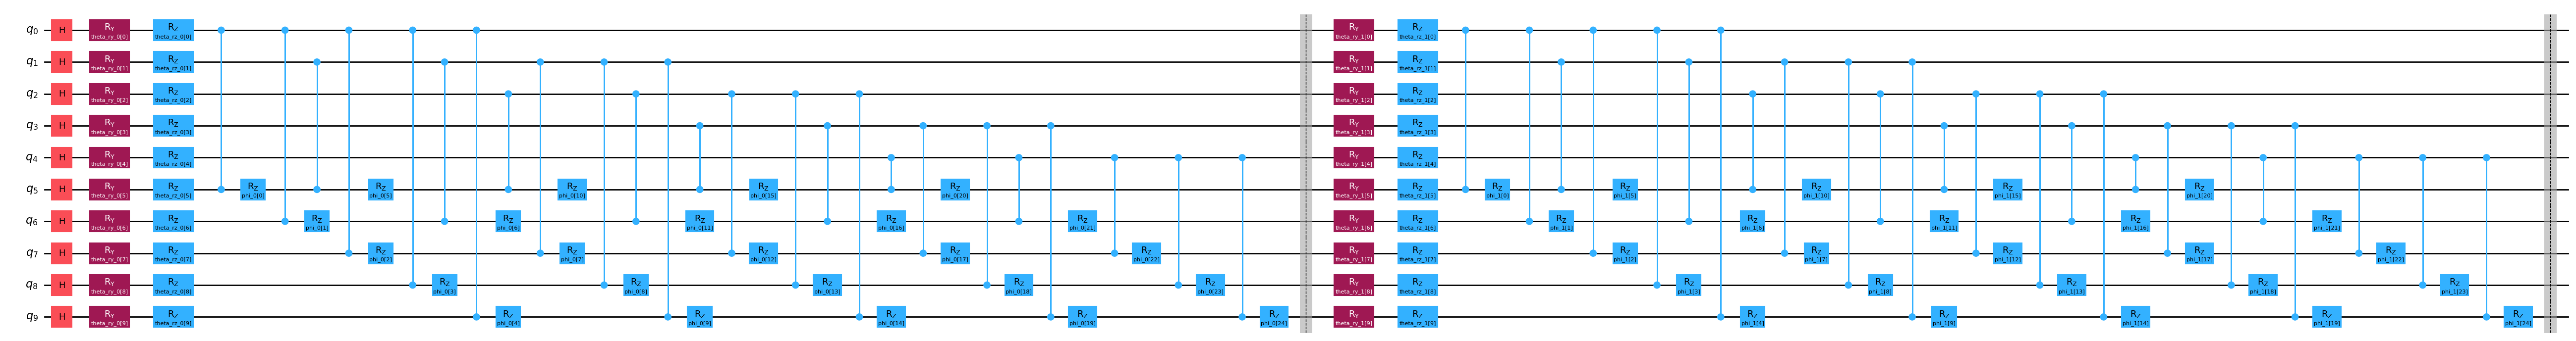

In [ ]:
ansatz = build_ansatz(graph)
ansatz.draw("mpl", fold=-1)

In [ ]:

def build_maxcut_hamiltonian(graph: nx.Graph) -> SparsePauliOp:
    """
    Build the MaxCut Hamiltonian for the given graph H = (|E|/2)*I - (1/2)*Σ_{(i,j)∈E}(Z_i Z_j)
    """
    num_qubits = len(graph.nodes)
    edges = list(graph.edges())
    num_edges = len(edges)

    pauli_terms = ["I"*num_qubits] # start with identity
    coeffs = [-num_edges / 2]

    for (u, v) in edges: # for each edge, add -(1/2)*Z_i Z_j
        z_term = ["I"] * num_qubits
        z_term[u] = "Z"
        z_term[v] = "Z"
        pauli_terms.append("".join(z_term))
        coeffs.append(0.5)

    # Balance part: (λ/4) * (N I + Σ_{i≠j} Z_i Z_j) -> We want nodes of graph subset to be balanced to num_qubits/2.
    # We want to sum nodes with index '1' and subtract it with num_qubits/2 and square it to see the positve squared difference.
    # This way, we can add the term to the original Hamiltonian for further optimization.

    lambda_balance = 1 # param
    pauli_terms.append("I" * num_qubits)
    coeffs.append(lambda_balance * num_qubits / 4)

    for i in range(num_qubits):
        for j in range(i + 1, num_qubits):
            zz_term = ["I"] * num_qubits
            zz_term[i] = "Z"
            zz_term[j] = "Z"
            pauli_terms.append("".join(zz_term))
            coeffs.append(lambda_balance / 4) # Z_i Z_j terms for all pairs of nodes
            
    return SparsePauliOp.from_list(list(zip(pauli_terms, coeffs)))


In [ ]:
ham = build_maxcut_hamiltonian(graph)
ham

SparsePauliOp(['IIIIIIIIII', 'ZIIIIZIIII', 'ZIIIIIZIII', 'ZIIIIIIZII', 'ZIIIIIIIZI', 'ZIIIIIIIIZ', 'IZIIIZIIII', 'IZIIIIZIII', 'IZIIIIIZII', 'IZIIIIIIZI', 'IZIIIIIIIZ', 'IIZIIZIIII', 'IIZIIIZIII', 'IIZIIIIZII', 'IIZIIIIIZI', 'IIZIIIIIIZ', 'IIIZIZIIII', 'IIIZIIZIII', 'IIIZIIIZII', 'IIIZIIIIZI', 'IIIZIIIIIZ', 'IIIIZZIIII', 'IIIIZIZIII', 'IIIIZIIZII', 'IIIIZIIIZI', 'IIIIZIIIIZ', 'IIIIIIIIII', 'ZZIIIIIIII', 'ZIZIIIIIII', 'ZIIZIIIIII', 'ZIIIZIIIII', 'ZIIIIZIIII', 'ZIIIIIZIII', 'ZIIIIIIZII', 'ZIIIIIIIZI', 'ZIIIIIIIIZ', 'IZZIIIIIII', 'IZIZIIIIII', 'IZIIZIIIII', 'IZIIIZIIII', 'IZIIIIZIII', 'IZIIIIIZII', 'IZIIIIIIZI', 'IZIIIIIIIZ', 'IIZZIIIIII', 'IIZIZIIIII', 'IIZIIZIIII', 'IIZIIIZIII', 'IIZIIIIZII', 'IIZIIIIIZI', 'IIZIIIIIIZ', 'IIIZZIIIII', 'IIIZIZIIII', 'IIIZIIZIII', 'IIIZIIIZII', 'IIIZIIIIZI', 'IIIZIIIIIZ', 'IIIIZZIIII', 'IIIIZIZIII', 'IIIIZIIZII', 'IIIIZIIIZI', 'IIIIZIIIIZ', 'IIIIIZZIII', 'IIIIIZIZII', 'IIIIIZIIZI', 'IIIIIZIIIZ', 'IIIIIIZZII', 'IIIIIIZIZI', 'IIIIIIZIIZ', 'IIIIIIIZZI', 'IIII

In [ ]:
def compute_cut_size(graph, bitstring):
    """
    Get the cut size of the partition of ``graph`` described by the given
    ``bitstring``.
    """
    cut_sz = 0
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_sz += 1
    return cut_sz

In [ ]:
def get_ising_energies(
        operator: SparsePauliOp, 
        states: np.array
    ):
    """
    Get the energies of the given Ising ``operator`` that correspond to the
    given ``states``.
    """
    # Unroll Hamiltonian data into NumPy arrays
    paulis = np.array([list(ops) for ops, _ in operator.label_iter()]) != "I"
    coeffs = operator.coeffs.real
    
    # Vectorized energies computation
    energies = (-1) ** (states @ paulis.T) @ coeffs
    return energies

In [ ]:
def expected_energy(
        hamiltonian: SparsePauliOp,
        measurements: np.array
):
    """
    Compute the expected energy of the given ``hamiltonian`` with respect to
    the observed ``measurement``.

    The latter is assumed to by a NumPy records array with fields ``states``
    --describing the observed bit-strings as an integer array-- and ``counts``,
    describing the corresponding observed frequency of each state.
    """
    energies = get_ising_energies(hamiltonian, measurements["states"])
    return np.dot(energies, measurements["counts"]) / measurements["counts"].sum()

In [ ]:
def interpret_solution(graph, bitstring):
    """
    Visualize the given ``bitstring`` as a partition of the given ``graph``.
    """
    pos = nx.spring_layout(graph, seed=42)
    set_0 = [i for i, b in enumerate(bitstring) if b == '0']
    set_1 = [i for i, b in enumerate(bitstring) if b == '1']

    plt.figure(figsize=(4, 4))
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_0, node_color='blue', node_size=700)
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_1, node_color='red', node_size=700)

    cut_edges = []
    non_cut_edges = []
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_edges.append((u, v))
        else:
            non_cut_edges.append((u, v))

    nx.draw_networkx_edges(graph, pos=pos, edgelist=non_cut_edges, edge_color='gray', width=2)
    nx.draw_networkx_edges(graph, pos=pos, edgelist=cut_edges, edge_color='green', width=2, style='dashed')

    nx.draw_networkx_labels(graph, pos=pos, font_color='white', font_weight='bold')
    plt.axis('off')
    plt.show()

In [ ]:
class QITEvolver:
    """
    A class to evolve a parametrized quantum state under the action of an Ising
    Hamiltonian according to the variational Quantum Imaginary Time Evolution
    (QITE) principle described in IonQ's latest joint paper with ORNL.
    """
    def __init__(self, hamiltonian: SparsePauliOp, ansatz: QuantumCircuit):
        self.hamiltonian = hamiltonian
        self.ansatz = ansatz

        # Define some constants
        self.backend = AerSimulator()
        self.num_shots = 10000
        self.energies, self.param_vals, self.runtime = list(), list(), list()

    def evolve(self, num_steps: int, lr: float = 0.4, verbose: bool = True):
        """
        Evolve the variational quantum state encoded by ``self.ansatz`` under
        the action of ``self.hamiltonian`` according to varQITE.
        """
        curr_params = np.zeros(self.ansatz.num_parameters)
        for k in range(num_steps):
            # Get circuits and measure on backend
            iter_qc = self.get_iteration_circuits(curr_params)
            job = self.backend.run(iter_qc, shots=self.num_shots)
            q0 = time.time()
            measurements = job.result().get_counts()
            quantum_exec_time = time.time() - q0

            # Update parameters-- set up defining ODE and step forward
            Gmat, dvec, curr_energy = self.get_defining_ode(measurements)
            dcurr_params = np.linalg.lstsq(Gmat, dvec, rcond=1e-2)[0]
            curr_params += lr * dcurr_params

            # Progress checkpoint!
            if verbose:
                self.print_status(measurements)
            self.energies.append(curr_energy)
            self.param_vals.append(curr_params.copy())
            self.runtime.append(quantum_exec_time)

    def get_defining_ode(self, measurements: List[dict[str, int]]):
        """
        Construct the dynamics matrix and load vector defining the varQITE
        iteration.
        """
        # Load sampled bitstrings and corresponding frequencies into NumPy arrays
        dtype = np.dtype([("states", int, (self.ansatz.num_qubits,)), ("counts", "f")])
        measurements = [np.fromiter(map(lambda kv: (list(kv[0]), kv[1]), res.items()), dtype) for res in measurements]

        # Set up the dynamics matrix by computing the gradient of each Pauli word
        # with respect to each parameter in the ansatz using the parameter-shift rule
        pauli_terms = [SparsePauliOp(op) for op, _ in self.hamiltonian.label_iter() if set(op) != set("I")]
        Gmat = np.zeros((len(pauli_terms), self.ansatz.num_parameters))
        for i, pauli_word in enumerate(pauli_terms):
            for j, jth_pair in enumerate(zip(measurements[1::2], measurements[2::2])):
                for pm, pm_shift in enumerate(jth_pair):
                    Gmat[i, j] += (-1)**pm * expected_energy(pauli_word, pm_shift)
        
        # Set up the load vector
        curr_energy = expected_energy(self.hamiltonian, measurements[0])
        dvec = np.zeros(len(pauli_terms))
        for i, pauli_word in enumerate(pauli_terms):
            rhs_op_energies = get_ising_energies(pauli_word, measurements[0]["states"])
            rhs_op_energies *= get_ising_energies(self.hamiltonian, measurements[0]["states"]) - curr_energy
            dvec[i] = -np.dot(rhs_op_energies, measurements[0]["counts"]) / self.num_shots
        return Gmat, dvec, curr_energy

    def get_iteration_circuits(self, curr_params: np.array):
        """
        Get the bound circuits that need to be evaluated to step forward
        according to QITE.
        """
        # Use this circuit to estimate your Hamiltonian's expected value
        circuits = [self.ansatz.assign_parameters(curr_params)]

        # Use these circuits to compute gradients
        for k in np.arange(curr_params.shape[0]):
            for j in range(2):
                pm_shift = curr_params.copy()
                pm_shift[k] += (-1)**j * np.pi/2
                circuits += [self.ansatz.assign_parameters(pm_shift)]
        
        # Add measurement gates and return
        [qc.measure_all() for qc in circuits]
        return circuits
    
    def plot_convergence(self):
        """
        Plot the convergence of the expected value of ``self.hamiltonian`` with
        respect to the (imaginary) time steps.
        """
        plt.plot(self.energies)
        plt.xlabel("(Imaginary) Time step")
        plt.ylabel("Hamiltonian energy")
        plt.title("Convergence of the expected energy")

    def print_status(self, measurements):
        """
        Print summary statistics describing a QITE run.
        """
        stats = pd.DataFrame({
            "curr_energy": self.energies,
            "num_circuits": [len(measurements)] * len(self.energies),
            "quantum_exec_time": self.runtime 
        })
        stats.index.name = "step"
        display.clear_output(wait=True)
        display.display(stats)

,curr_energy,num_circuits,quantum_exec_time
step,,,
0,-10.04225,181,5.188640
1,-10.13585,181,6.384037
2,-10.19455,181,6.908234
3,-10.20955,181,6.550842
4,-9.32130,181,6.390183
5,-8.69915,181,6.772601
6,-9.90825,181,6.761846
7,-9.31135,181,6.237912
8,-10.80960,181,6.937064


CPU times: total: 28min 48s
Wall time: 10min 14s


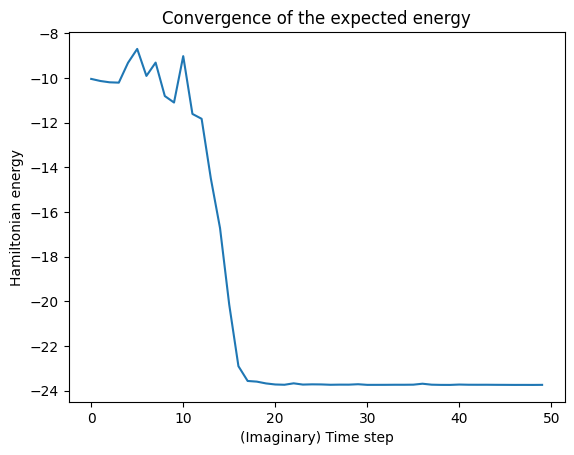

In [ ]:
%%time

# Set up your QITEvolver and evolve!
qit_evolver = QITEvolver(ham, ansatz)
qit_evolver.evolve(num_steps=50, lr=0.5, verbose=True) # lr was 0.5

# Visualize your results!
qit_evolver.plot_convergence()

In [ ]:
from qiskit_aer import AerSimulator

shots = 100_000

# Sample your optimized quantum state using Aer
backend = AerSimulator()
optimized_state = ansatz.assign_parameters(qit_evolver.param_vals[-1])
optimized_state.measure_all()
counts = backend.run(optimized_state, shots=shots).result().get_counts()

# Find the sampled bitstring with the largest cut value
cut_vals = sorted(((bs, compute_cut_size(graph, bs)) for bs in counts), key=lambda t: t[1])
best_bs = cut_vals[-1][0]

# Now find the most likely MaxCut solution as sampled from your optimized state
# We'll leave this part up to you!!!
most_likely_soln = ""

print(counts)

{'1111101000': 4, '1111100000': 99961, '1111110000': 1, '1101100000': 20, '1111100001': 4, '1111100010': 5, '0111100000': 3, '1111000000': 1, '1110100001': 1}


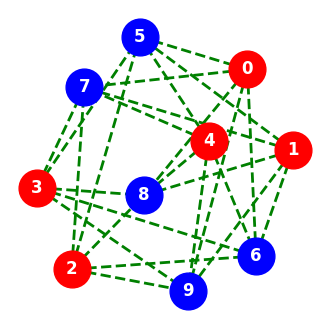

Cut value: 25
Graph named 'complete_bipartite_graph(5, 5)' with 10 nodes and 25 edges 1111100000


In [ ]:
interpret_solution(graph, best_bs)
print("Cut value: "+str(compute_cut_size(graph, best_bs)))
print(graph, best_bs)

In [ ]:
%%time
# Brute-force approach with conditional checks

verbose = False

G = graph
n = len(G.nodes())
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = 1.0
if verbose:
    print(w)

best_cost_brute = 0
best_cost_balanced = 0
best_cost_connected = 0

for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]

    # Create subgraphs based on the partition
    subgraph0 = G.subgraph([i for i, val in enumerate(x) if val == 0])
    subgraph1 = G.subgraph([i for i, val in enumerate(x) if val == 1])

    bs = "".join(str(i) for i in x)
    
    # Check if subgraphs are not empty
    if len(subgraph0.nodes) > 0 and len(subgraph1.nodes) > 0:
        cost = 0
        for i in range(n):
            for j in range(n):
                cost = cost + w[i, j] * x[i] * (1 - x[j])
        if best_cost_brute < cost:
            best_cost_brute = cost
            xbest_brute = x
            XS_brut = []
        if best_cost_brute == cost:
            XS_brut.append(bs)

        outstr = "case = " + str(x) + " cost = " + str(cost)

        if (len(subgraph1.nodes)-len(subgraph0.nodes))**2 <= 1:
            outstr += " balanced"
            if best_cost_balanced < cost:
                best_cost_balanced = cost
                xbest_balanced = x
                XS_balanced = []
            if best_cost_balanced == cost:
                XS_balanced.append(bs)

        if nx.is_connected(subgraph0) and nx.is_connected(subgraph1):
            outstr += " connected"
            if best_cost_connected < cost:
                best_cost_connected = cost
                xbest_connected = x
                XS_connected = []
            if best_cost_connected == cost:
                XS_connected.append(bs)
        if verbose:
            print(outstr)


CPU times: total: 406 ms
Wall time: 412 ms


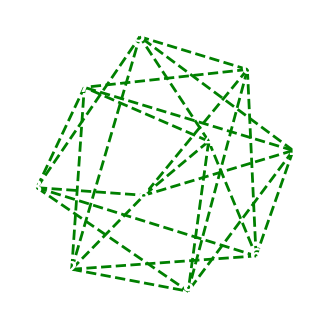

Graph named 'complete_bipartite_graph(5, 5)' with 10 nodes and 25 edges [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

Best solution = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0] cost = 25.0
['1111100000', '0000011111']


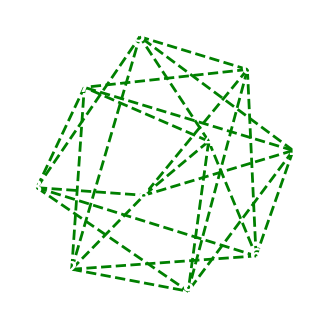

Graph named 'complete_bipartite_graph(5, 5)' with 10 nodes and 25 edges [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

Best balanced = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0] cost = 25.0
['1111100000', '0000011111']


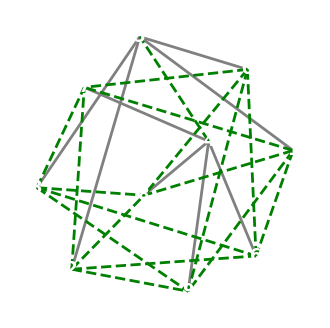

Graph named 'complete_bipartite_graph(5, 5)' with 10 nodes and 25 edges [1, 1, 1, 1, 0, 1, 0, 0, 0, 0]

Best connected = [1, 1, 1, 1, 0, 1, 0, 0, 0, 0] cost = 17.0
['1111010000', '1110110000', '1101110000', '1011110000', '0111110000', '1111001000', '1110101000', '1101101000', '1011101000', '0111101000', '1111000100', '1110100100', '1101100100', '1011100100', '0111100100', '1111000010', '1110100010', '1101100010', '1011100010', '0111100010', '1000011110', '0100011110', '0010011110', '0001011110', '0000111110', '1111000001', '1110100001', '1101100001', '1011100001', '0111100001', '1000011101', '0100011101', '0010011101', '0001011101', '0000111101', '1000011011', '0100011011', '0010011011', '0001011011', '0000111011', '1000010111', '0100010111', '0010010111', '0001010111', '0000110111', '1000001111', '0100001111', '0010001111', '0001001111', '0000101111']


In [ ]:
# This is classical brute force solver results:
interpret_solution(graph, xbest_brute)
print(graph, xbest_brute)
print("\nBest solution = " + str(xbest_brute) + " cost = " + str(best_cost_brute))
print(XS_brut)

interpret_solution(graph, xbest_balanced)
print(graph, xbest_balanced)
print("\nBest balanced = " + str(xbest_balanced) + " cost = " + str(best_cost_balanced))
print(XS_balanced)

interpret_solution(graph, xbest_connected)
print(graph, xbest_connected)
print("\nBest connected = " + str(xbest_connected) + " cost = " + str(best_cost_connected))
print(XS_connected)
plt.show()

In [ ]:
# And this is how we calculate the shots counted toward scores for each class of the problems

sum_counts = 0
for bs in counts:
    if bs in XS_brut:
        sum_counts += counts[bs]

print(f"Pure max-cut: {sum_counts} out of {shots}")

sum_balanced_counts = 0
for bs in counts:
    if bs in XS_balanced:
        sum_balanced_counts += counts[bs]

print(f"Balanced max-cut: {sum_balanced_counts} out of {shots}")

sum_connected_counts = 0
for bs in counts:
    if bs in XS_connected:
        sum_connected_counts += counts[bs]

print(f"Connected max-cut: {sum_connected_counts} out of {shots}")

Pure max-cut: 99961 out of 100000
Balanced max-cut: 99961 out of 100000
Connected max-cut: 1 out of 100000


In [ ]:
def final_score(graph, XS_brut,counts,shots,ansatz,challenge):

    if(challenge=='base'):
        sum_counts = 0
        for bs in counts:
            if bs in XS_brut:
                sum_counts += counts[bs]
    elif(challenge=='balanced'):
        sum_balanced_counts = 0
        for bs in counts:
            if bs in XS_balanced:
                sum_balanced_counts += counts[bs]        
        sum_counts = sum_balanced_counts
    elif(challenge=='connected'):
        sum_connected_counts = 0
        for bs in counts:
            if bs in XS_connected:
                sum_connected_counts += counts[bs]
        sum_counts = sum_connected_counts

    
    transpiled_ansatz = transpile(ansatz, basis_gates = ['cx','rz','sx','x'])
    cx_count = transpiled_ansatz.count_ops()['cx']
    score = (4*2*graph.number_of_edges())/(4*2*graph.number_of_edges() + cx_count) * sum_counts/shots

    return np.round(score,5)

In [ ]:
print("Base score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'base')))
print("Balanced score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'balanced')))
print("Connected score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'connected')))

Base score: 0.79969
Balanced score: 0.79969
Connected score: 1e-05


## Graph4
Base score: 0.79992

In [ ]:
graph = graph4
graph

In [ ]:
# Visualization will be performed in the cells below;

def build_ansatz(graph: nx.Graph, layers: int = 2) -> QuantumCircuit:
    
    num_qubits = graph.number_of_nodes()
    qc = QuantumCircuit(num_qubits)
    
    
    qc.h(range(num_qubits)) # Uniform superposition using Hadamard gates

    for layer in range(layers):
        theta_ry = ParameterVector(f"theta_ry_{layer}", num_qubits) # Apply single-qubit parameterized rotations
        theta_rz = ParameterVector(f"theta_rz_{layer}", num_qubits) # Apply single-qubit parameterized rotations
        for q in range(num_qubits): # Rotation gates
            qc.ry(theta_ry[q], q)
            qc.rz(theta_rz[q], q)

        phi = ParameterVector(f"phi_{layer}", len(graph.edges())) # Entangling layer using CZ or CRX instead of CXs
        for edge_idx, (u, v) in enumerate(graph.edges()):
            qc.cz(u, v)  # Controlled-Z instead of two CXs
            qc.rz(phi[edge_idx], v)  # Parameterized rotation on one qubit

        qc.barrier()

    return qc


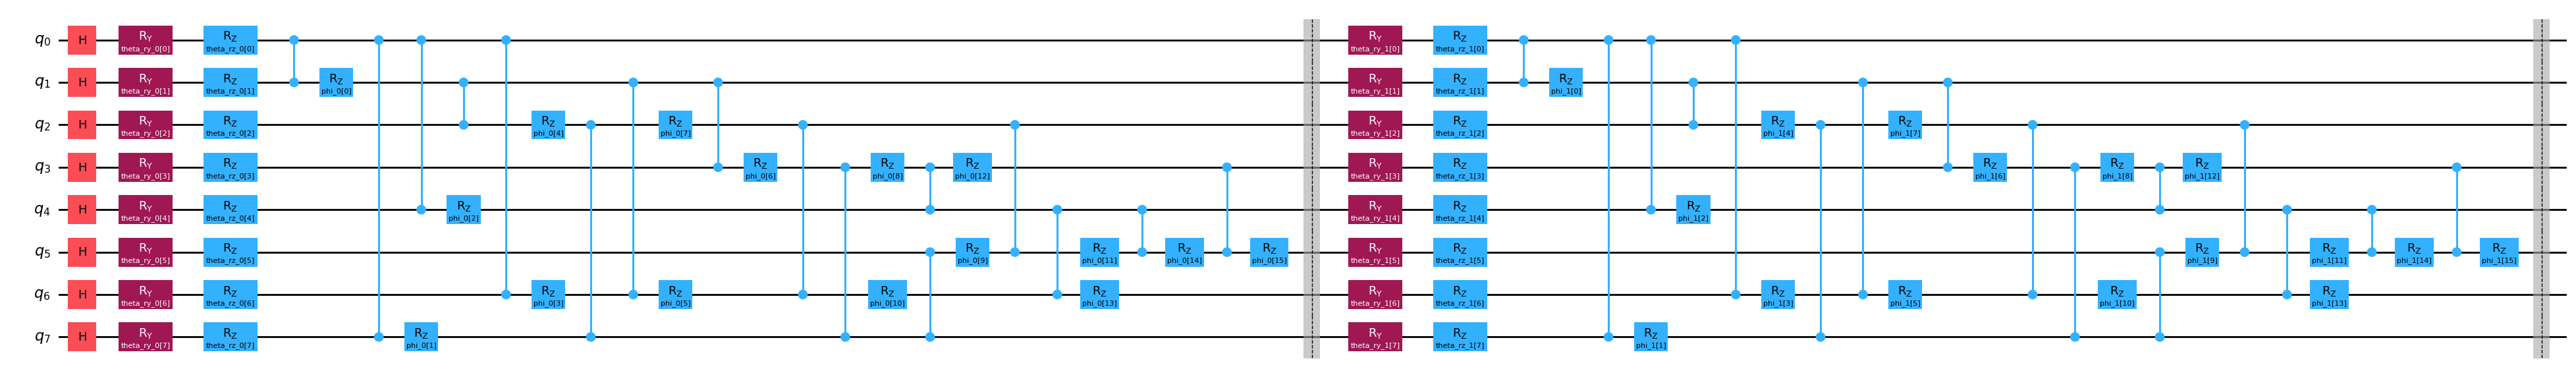

In [ ]:
ansatz = build_ansatz(graph)
ansatz.draw("mpl", fold=-1)

In [ ]:

def build_maxcut_hamiltonian(graph: nx.Graph) -> SparsePauliOp:
    """
    Build the MaxCut Hamiltonian for the given graph H = (|E|/2)*I - (1/2)*Σ_{(i,j)∈E}(Z_i Z_j)
    """
    num_qubits = len(graph.nodes)
    edges = list(graph.edges())
    num_edges = len(edges)

    pauli_terms = ["I"*num_qubits] # start with identity
    coeffs = [-num_edges / 2]

    for (u, v) in edges: # for each edge, add -(1/2)*Z_i Z_j
        z_term = ["I"] * num_qubits
        z_term[u] = "Z"
        z_term[v] = "Z"
        pauli_terms.append("".join(z_term))
        coeffs.append(0.5)

    # Balance part: (λ/4) * (N I + Σ_{i≠j} Z_i Z_j) -> We want nodes of graph subset to be balanced to num_qubits/2.
    # We want to sum nodes with index '1' and subtract it with num_qubits/2 and square it to see the positve squared difference.
    # This way, we can add the term to the original Hamiltonian for further optimization.

    lambda_balance = 1 # param
    pauli_terms.append("I" * num_qubits)
    coeffs.append(lambda_balance * num_qubits / 4)

    for i in range(num_qubits):
        for j in range(i + 1, num_qubits):
            zz_term = ["I"] * num_qubits
            zz_term[i] = "Z"
            zz_term[j] = "Z"
            pauli_terms.append("".join(zz_term))
            coeffs.append(lambda_balance / 4) # Z_i Z_j terms for all pairs of nodes
            
    return SparsePauliOp.from_list(list(zip(pauli_terms, coeffs)))


In [ ]:
ham = build_maxcut_hamiltonian(graph)
ham

SparsePauliOp(['IIIIIIII', 'ZZIIIIII', 'ZIIIIIIZ', 'ZIIIZIII', 'ZIIIIIZI', 'IZZIIIII', 'IZIIIIZI', 'IZIZIIII', 'IIZIIIIZ', 'IIIZIIIZ', 'IIIIIZIZ', 'IIZIIIZI', 'IIZIIZII', 'IIIZZIII', 'IIIIZIZI', 'IIIIZZII', 'IIIZIZII', 'IIIIIIII', 'ZZIIIIII', 'ZIZIIIII', 'ZIIZIIII', 'ZIIIZIII', 'ZIIIIZII', 'ZIIIIIZI', 'ZIIIIIIZ', 'IZZIIIII', 'IZIZIIII', 'IZIIZIII', 'IZIIIZII', 'IZIIIIZI', 'IZIIIIIZ', 'IIZZIIII', 'IIZIZIII', 'IIZIIZII', 'IIZIIIZI', 'IIZIIIIZ', 'IIIZZIII', 'IIIZIZII', 'IIIZIIZI', 'IIIZIIIZ', 'IIIIZZII', 'IIIIZIZI', 'IIIIZIIZ', 'IIIIIZZI', 'IIIIIZIZ', 'IIIIIIZZ'],
              coeffs=[-8.  +0.j,  0.5 +0.j,  0.5 +0.j,  0.5 +0.j,  0.5 +0.j,  0.5 +0.j,
  0.5 +0.j,  0.5 +0.j,  0.5 +0.j,  0.5 +0.j,  0.5 +0.j,  0.5 +0.j,
  0.5 +0.j,  0.5 +0.j,  0.5 +0.j,  0.5 +0.j,  0.5 +0.j,  2.  +0.j,
  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
  0.25+0.

In [ ]:
def compute_cut_size(graph, bitstring):
    """
    Get the cut size of the partition of ``graph`` described by the given
    ``bitstring``.
    """
    cut_sz = 0
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_sz += 1
    return cut_sz

In [ ]:
def get_ising_energies(
        operator: SparsePauliOp, 
        states: np.array
    ):
    """
    Get the energies of the given Ising ``operator`` that correspond to the
    given ``states``.
    """
    # Unroll Hamiltonian data into NumPy arrays
    paulis = np.array([list(ops) for ops, _ in operator.label_iter()]) != "I"
    coeffs = operator.coeffs.real
    
    # Vectorized energies computation
    energies = (-1) ** (states @ paulis.T) @ coeffs
    return energies

In [ ]:
def expected_energy(
        hamiltonian: SparsePauliOp,
        measurements: np.array
):
    """
    Compute the expected energy of the given ``hamiltonian`` with respect to
    the observed ``measurement``.

    The latter is assumed to by a NumPy records array with fields ``states``
    --describing the observed bit-strings as an integer array-- and ``counts``,
    describing the corresponding observed frequency of each state.
    """
    energies = get_ising_energies(hamiltonian, measurements["states"])
    return np.dot(energies, measurements["counts"]) / measurements["counts"].sum()

In [ ]:
def interpret_solution(graph, bitstring):
    """
    Visualize the given ``bitstring`` as a partition of the given ``graph``.
    """
    pos = nx.spring_layout(graph, seed=42)
    set_0 = [i for i, b in enumerate(bitstring) if b == '0']
    set_1 = [i for i, b in enumerate(bitstring) if b == '1']

    plt.figure(figsize=(4, 4))
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_0, node_color='blue', node_size=700)
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_1, node_color='red', node_size=700)

    cut_edges = []
    non_cut_edges = []
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_edges.append((u, v))
        else:
            non_cut_edges.append((u, v))

    nx.draw_networkx_edges(graph, pos=pos, edgelist=non_cut_edges, edge_color='gray', width=2)
    nx.draw_networkx_edges(graph, pos=pos, edgelist=cut_edges, edge_color='green', width=2, style='dashed')

    nx.draw_networkx_labels(graph, pos=pos, font_color='white', font_weight='bold')
    plt.axis('off')
    plt.show()

In [ ]:
class QITEvolver:
    """
    A class to evolve a parametrized quantum state under the action of an Ising
    Hamiltonian according to the variational Quantum Imaginary Time Evolution
    (QITE) principle described in IonQ's latest joint paper with ORNL.
    """
    def __init__(self, hamiltonian: SparsePauliOp, ansatz: QuantumCircuit):
        self.hamiltonian = hamiltonian
        self.ansatz = ansatz

        # Define some constants
        self.backend = AerSimulator()
        self.num_shots = 10000
        self.energies, self.param_vals, self.runtime = list(), list(), list()

    def evolve(self, num_steps: int, lr: float = 0.4, verbose: bool = True):
        """
        Evolve the variational quantum state encoded by ``self.ansatz`` under
        the action of ``self.hamiltonian`` according to varQITE.
        """
        curr_params = np.zeros(self.ansatz.num_parameters)
        for k in range(num_steps):
            # Get circuits and measure on backend
            iter_qc = self.get_iteration_circuits(curr_params)
            job = self.backend.run(iter_qc, shots=self.num_shots)
            q0 = time.time()
            measurements = job.result().get_counts()
            quantum_exec_time = time.time() - q0

            # Update parameters-- set up defining ODE and step forward
            Gmat, dvec, curr_energy = self.get_defining_ode(measurements)
            dcurr_params = np.linalg.lstsq(Gmat, dvec, rcond=1e-2)[0]
            curr_params += lr * dcurr_params

            # Progress checkpoint!
            if verbose:
                self.print_status(measurements)
            self.energies.append(curr_energy)
            self.param_vals.append(curr_params.copy())
            self.runtime.append(quantum_exec_time)

    def get_defining_ode(self, measurements: List[dict[str, int]]):
        """
        Construct the dynamics matrix and load vector defining the varQITE
        iteration.
        """
        # Load sampled bitstrings and corresponding frequencies into NumPy arrays
        dtype = np.dtype([("states", int, (self.ansatz.num_qubits,)), ("counts", "f")])
        measurements = [np.fromiter(map(lambda kv: (list(kv[0]), kv[1]), res.items()), dtype) for res in measurements]

        # Set up the dynamics matrix by computing the gradient of each Pauli word
        # with respect to each parameter in the ansatz using the parameter-shift rule
        pauli_terms = [SparsePauliOp(op) for op, _ in self.hamiltonian.label_iter() if set(op) != set("I")]
        Gmat = np.zeros((len(pauli_terms), self.ansatz.num_parameters))
        for i, pauli_word in enumerate(pauli_terms):
            for j, jth_pair in enumerate(zip(measurements[1::2], measurements[2::2])):
                for pm, pm_shift in enumerate(jth_pair):
                    Gmat[i, j] += (-1)**pm * expected_energy(pauli_word, pm_shift)
        
        # Set up the load vector
        curr_energy = expected_energy(self.hamiltonian, measurements[0])
        dvec = np.zeros(len(pauli_terms))
        for i, pauli_word in enumerate(pauli_terms):
            rhs_op_energies = get_ising_energies(pauli_word, measurements[0]["states"])
            rhs_op_energies *= get_ising_energies(self.hamiltonian, measurements[0]["states"]) - curr_energy
            dvec[i] = -np.dot(rhs_op_energies, measurements[0]["counts"]) / self.num_shots
        return Gmat, dvec, curr_energy

    def get_iteration_circuits(self, curr_params: np.array):
        """
        Get the bound circuits that need to be evaluated to step forward
        according to QITE.
        """
        # Use this circuit to estimate your Hamiltonian's expected value
        circuits = [self.ansatz.assign_parameters(curr_params)]

        # Use these circuits to compute gradients
        for k in np.arange(curr_params.shape[0]):
            for j in range(2):
                pm_shift = curr_params.copy()
                pm_shift[k] += (-1)**j * np.pi/2
                circuits += [self.ansatz.assign_parameters(pm_shift)]
        
        # Add measurement gates and return
        [qc.measure_all() for qc in circuits]
        return circuits
    
    def plot_convergence(self):
        """
        Plot the convergence of the expected value of ``self.hamiltonian`` with
        respect to the (imaginary) time steps.
        """
        plt.plot(self.energies)
        plt.xlabel("(Imaginary) Time step")
        plt.ylabel("Hamiltonian energy")
        plt.title("Convergence of the expected energy")

    def print_status(self, measurements):
        """
        Print summary statistics describing a QITE run.
        """
        stats = pd.DataFrame({
            "curr_energy": self.energies,
            "num_circuits": [len(measurements)] * len(self.energies),
            "quantum_exec_time": self.runtime 
        })
        stats.index.name = "step"
        display.clear_output(wait=True)
        display.display(stats)

,curr_energy,num_circuits,quantum_exec_time
step,,,
0,-6.01480,129,4.315182
1,-7.55145,129,4.435729
2,-8.67435,129,5.144769
3,-8.73555,129,5.235970
4,-9.20405,129,4.113413
5,-9.35565,129,4.051156
6,-9.61300,129,3.969404
7,-9.87350,129,3.889759
8,-10.08010,129,4.110241


CPU times: total: 16min 44s
Wall time: 4min 19s


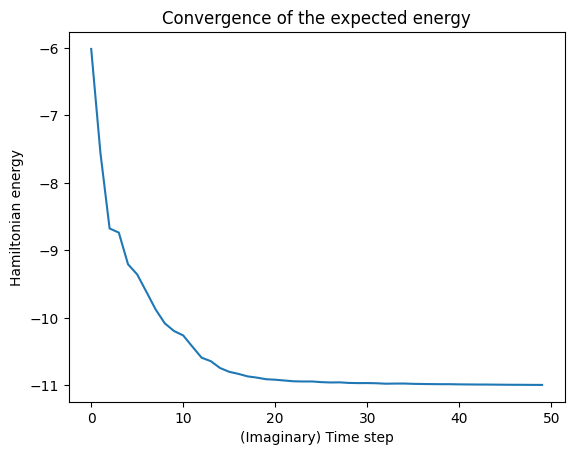

In [ ]:
%%time

# Set up your QITEvolver and evolve!
qit_evolver = QITEvolver(ham, ansatz)
qit_evolver.evolve(num_steps=50, lr=0.3, verbose=True) # lr was 0.5

# Visualize your results!
qit_evolver.plot_convergence()

In [ ]:
from qiskit_aer import AerSimulator

shots = 100_000

# Sample your optimized quantum state using Aer
backend = AerSimulator()
optimized_state = ansatz.assign_parameters(qit_evolver.param_vals[-1])
optimized_state.measure_all()
counts = backend.run(optimized_state, shots=shots).result().get_counts()

# Find the sampled bitstring with the largest cut value
cut_vals = sorted(((bs, compute_cut_size(graph, bs)) for bs in counts), key=lambda t: t[1])
best_bs = cut_vals[-1][0]

# Now find the most likely MaxCut solution as sampled from your optimized state
# We'll leave this part up to you!!!
most_likely_soln = ""

print(counts)

{'01000111': 92406, '01010111': 1, '01001101': 6070, '01001111': 1514, '01100111': 3, '01000101': 3, '01000011': 1, '00000101': 2}


C:\Users\whrud\AppData\Local\Temp\ipykernel_45468\3154274719.py:21: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(graph, pos=pos, edgelist=non_cut_edges, edge_color='gray', width=2)


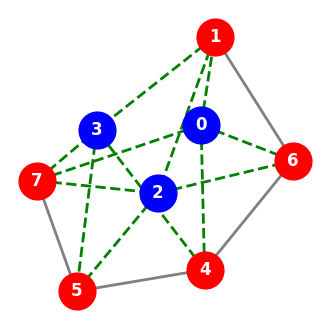

Cut value: 12
Graph with 8 nodes and 16 edges 01001111


In [ ]:
interpret_solution(graph, best_bs)
print("Cut value: "+str(compute_cut_size(graph, best_bs)))
print(graph, best_bs)

In [ ]:
%%time
# Brute-force approach with conditional checks

verbose = False

G = graph
n = len(G.nodes())
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = 1.0
if verbose:
    print(w)

best_cost_brute = 0
best_cost_balanced = 0
best_cost_connected = 0

for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]

    # Create subgraphs based on the partition
    subgraph0 = G.subgraph([i for i, val in enumerate(x) if val == 0])
    subgraph1 = G.subgraph([i for i, val in enumerate(x) if val == 1])

    bs = "".join(str(i) for i in x)
    
    # Check if subgraphs are not empty
    if len(subgraph0.nodes) > 0 and len(subgraph1.nodes) > 0:
        cost = 0
        for i in range(n):
            for j in range(n):
                cost = cost + w[i, j] * x[i] * (1 - x[j])
        if best_cost_brute < cost:
            best_cost_brute = cost
            xbest_brute = x
            XS_brut = []
        if best_cost_brute == cost:
            XS_brut.append(bs)

        outstr = "case = " + str(x) + " cost = " + str(cost)

        if (len(subgraph1.nodes)-len(subgraph0.nodes))**2 <= 1:
            outstr += " balanced"
            if best_cost_balanced < cost:
                best_cost_balanced = cost
                xbest_balanced = x
                XS_balanced = []
            if best_cost_balanced == cost:
                XS_balanced.append(bs)

        if nx.is_connected(subgraph0) and nx.is_connected(subgraph1):
            outstr += " connected"
            if best_cost_connected < cost:
                best_cost_connected = cost
                xbest_connected = x
                XS_connected = []
            if best_cost_connected == cost:
                XS_connected.append(bs)
        if verbose:
            print(outstr)


CPU times: total: 31.2 ms
Wall time: 39.8 ms


C:\Users\whrud\AppData\Local\Temp\ipykernel_45468\3154274719.py:21: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(graph, pos=pos, edgelist=non_cut_edges, edge_color='gray', width=2)


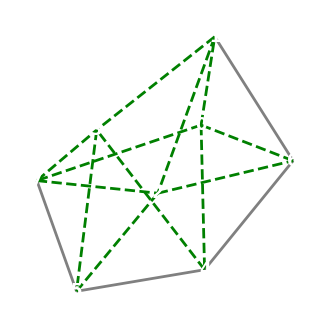

Graph with 8 nodes and 16 edges [1, 0, 1, 1, 0, 0, 0, 0]

Best solution = [1, 0, 1, 1, 0, 0, 0, 0] cost = 12.0
['10110000', '10111000', '10110100', '10110010', '10010110', '10110110', '01001001', '01101001', '01001101', '01001011', '01000111', '01001111']


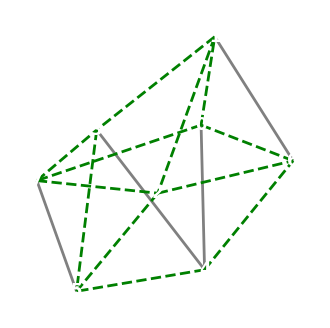

Graph with 8 nodes and 16 edges [1, 0, 1, 1, 1, 0, 0, 0]

Best balanced = [1, 0, 1, 1, 1, 0, 0, 0] cost = 12.0
['10111000', '10110100', '10110010', '10010110', '01101001', '01001101', '01001011', '01000111']


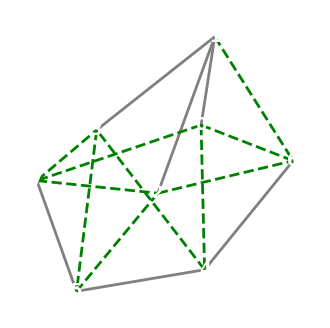

Graph with 8 nodes and 16 edges [1, 1, 1, 1, 0, 0, 0, 0]

Best connected = [1, 1, 1, 1, 0, 0, 0, 0] cost = 10.0
['11110000', '01111000', '11100100', '11010100', '11001100', '10101100', '01101100', '00111010', '10100110', '01010110', '00110110', '01001110', '10110001', '11001001', '10101001', '01011001', '11000101', '10010011', '01010011', '00110011', '00101011', '00011011', '10000111', '00001111']


In [ ]:
# This is classical brute force solver results:
interpret_solution(graph, xbest_brute)
print(graph, xbest_brute)
print("\nBest solution = " + str(xbest_brute) + " cost = " + str(best_cost_brute))
print(XS_brut)

interpret_solution(graph, xbest_balanced)
print(graph, xbest_balanced)
print("\nBest balanced = " + str(xbest_balanced) + " cost = " + str(best_cost_balanced))
print(XS_balanced)

interpret_solution(graph, xbest_connected)
print(graph, xbest_connected)
print("\nBest connected = " + str(xbest_connected) + " cost = " + str(best_cost_connected))
print(XS_connected)
plt.show()

In [ ]:
# And this is how we calculate the shots counted toward scores for each class of the problems

sum_counts = 0
for bs in counts:
    if bs in XS_brut:
        sum_counts += counts[bs]

print(f"Pure max-cut: {sum_counts} out of {shots}")

sum_balanced_counts = 0
for bs in counts:
    if bs in XS_balanced:
        sum_balanced_counts += counts[bs]

print(f"Balanced max-cut: {sum_balanced_counts} out of {shots}")

sum_connected_counts = 0
for bs in counts:
    if bs in XS_connected:
        sum_connected_counts += counts[bs]

print(f"Connected max-cut: {sum_connected_counts} out of {shots}")

Pure max-cut: 99990 out of 100000
Balanced max-cut: 98476 out of 100000
Connected max-cut: 0 out of 100000


In [ ]:
def final_score(graph, XS_brut,counts,shots,ansatz,challenge):

    if(challenge=='base'):
        sum_counts = 0
        for bs in counts:
            if bs in XS_brut:
                sum_counts += counts[bs]
    elif(challenge=='balanced'):
        sum_balanced_counts = 0
        for bs in counts:
            if bs in XS_balanced:
                sum_balanced_counts += counts[bs]        
        sum_counts = sum_balanced_counts
    elif(challenge=='connected'):
        sum_connected_counts = 0
        for bs in counts:
            if bs in XS_connected:
                sum_connected_counts += counts[bs]
        sum_counts = sum_connected_counts

    
    transpiled_ansatz = transpile(ansatz, basis_gates = ['cx','rz','sx','x'])
    cx_count = transpiled_ansatz.count_ops()['cx']
    score = (4*2*graph.number_of_edges())/(4*2*graph.number_of_edges() + cx_count) * sum_counts/shots

    return np.round(score,5)

In [ ]:
print("Base score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'base')))
print("Balanced score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'balanced')))
print("Connected score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'connected')))

Base score: 0.79992
Balanced score: 0.78781
Connected score: 0.0


## Graph5
Balanced score: 0.0

In [ ]:
graph = graph5
graph

In [ ]:
# Visualization will be performed in the cells below;

def build_ansatz(graph: nx.Graph, layers: int = 2) -> QuantumCircuit:
    
    num_qubits = graph.number_of_nodes()
    qc = QuantumCircuit(num_qubits)
    
    qc.h(range(num_qubits)) # Uniform superposition using Hadamard gates

    for layer in range(layers):
        theta_ry = ParameterVector(f"theta_ry_{layer}", num_qubits) # Apply single-qubit parameterized rotations
        theta_rz = ParameterVector(f"theta_rz_{layer}", num_qubits) # Apply single-qubit parameterized rotations
        for q in range(num_qubits): # Rotation gates
            qc.ry(theta_ry[q], q)
            qc.rz(theta_rz[q], q)

        phi = ParameterVector(f"phi_{layer}", len(graph.edges())) # Entangling layer using CZ or CRX instead of CXs
        for edge_idx, (u, v) in enumerate(graph.edges()):
            qc.cz(u, v)  # Controlled-Z instead of two CXs
            qc.rz(phi[edge_idx], v)  # Parameterized rotation on one qubit

        qc.barrier()

    return qc


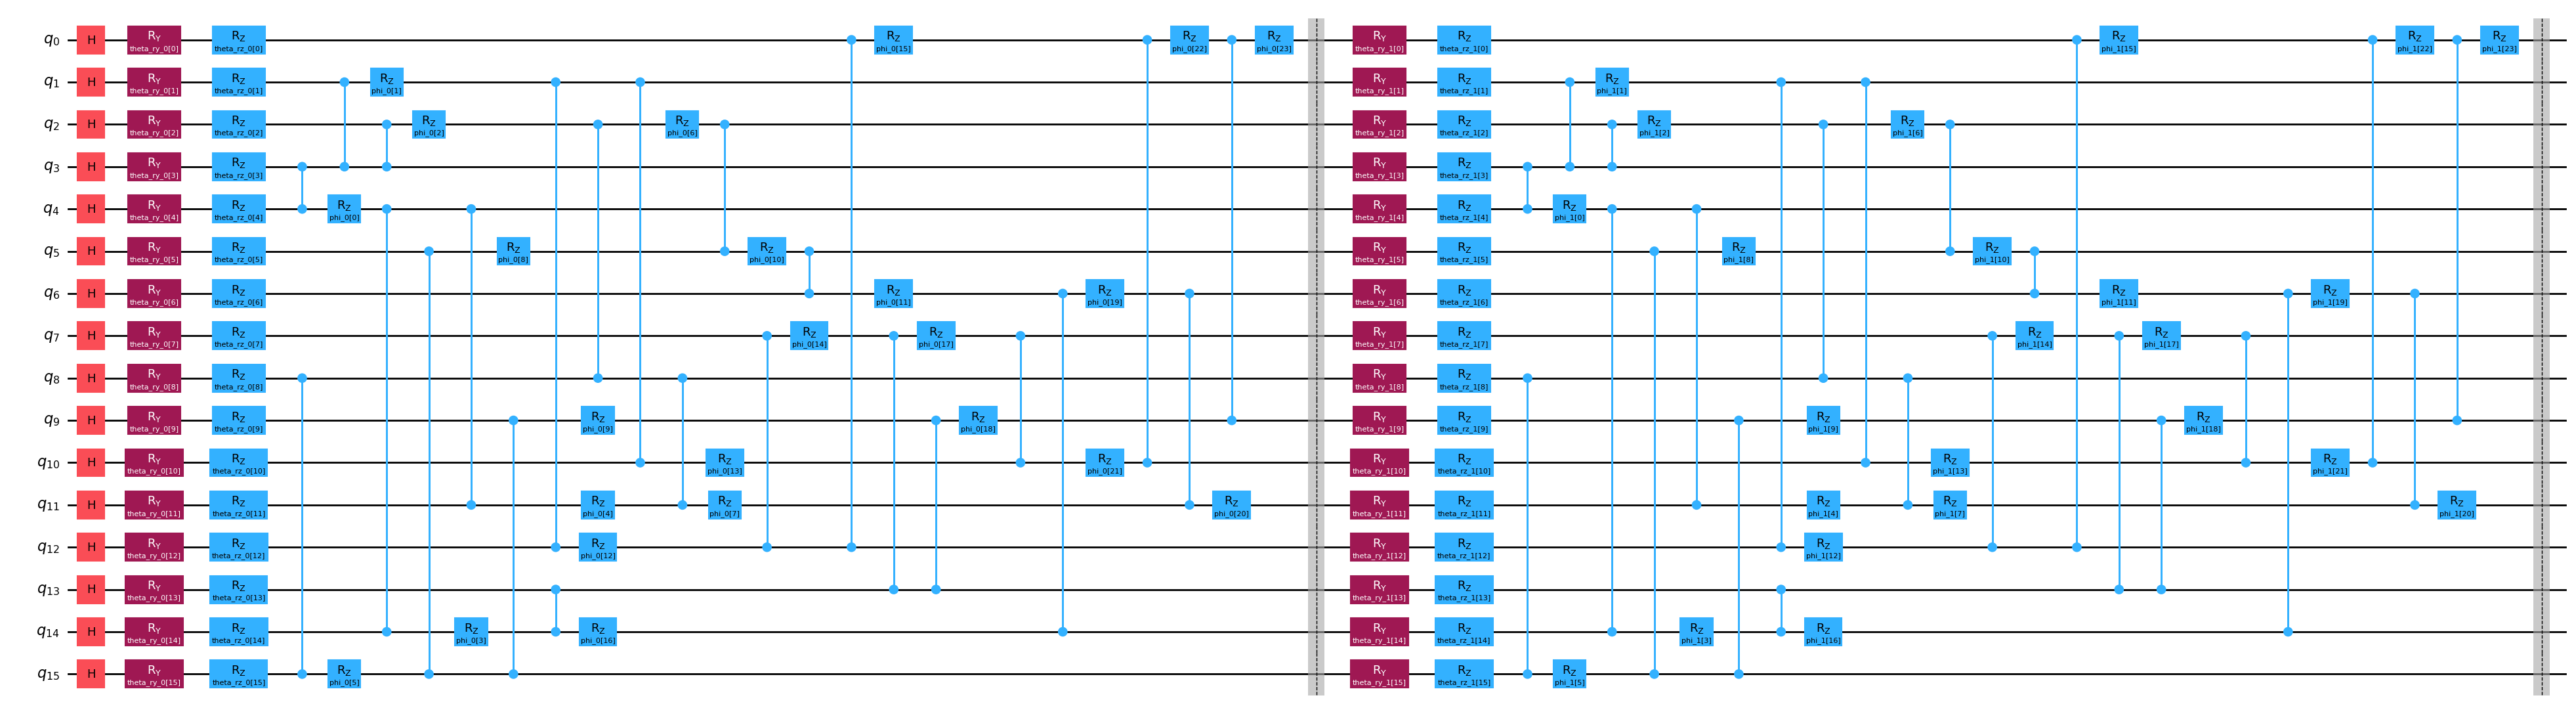

In [ ]:
ansatz = build_ansatz(graph)
ansatz.draw("mpl", fold=-1)

In [ ]:

def build_maxcut_hamiltonian(graph: nx.Graph) -> SparsePauliOp:
    """
    Build the MaxCut Hamiltonian for the given graph H = (|E|/2)*I - (1/2)*Σ_{(i,j)∈E}(Z_i Z_j)
    """
    num_qubits = len(graph.nodes)
    edges = list(graph.edges())
    num_edges = len(edges)

    pauli_terms = ["I"*num_qubits] # start with identity
    coeffs = [-num_edges / 2]

    for (u, v) in edges: # for each edge, add -(1/2)*Z_i Z_j
        z_term = ["I"] * num_qubits
        z_term[u] = "Z"
        z_term[v] = "Z"
        pauli_terms.append("".join(z_term))
        coeffs.append(0.5)

    # Balance part: (λ/4) * (N I + Σ_{i≠j} Z_i Z_j) -> We want nodes of graph subset to be balanced to num_qubits/2.
    # We want to sum nodes with index '1' and subtract it with num_qubits/2 and square it to see the positve squared difference.
    # This way, we can add the term to the original Hamiltonian for further optimization.

    lambda_balance = 1 # param
    pauli_terms.append("I" * num_qubits)
    coeffs.append(lambda_balance * num_qubits / 4)

    for i in range(num_qubits):
        for j in range(i + 1, num_qubits):
            zz_term = ["I"] * num_qubits
            zz_term[i] = "Z"
            zz_term[j] = "Z"
            pauli_terms.append("".join(zz_term))
            coeffs.append(lambda_balance / 4) # Z_i Z_j terms for all pairs of nodes
            
    return SparsePauliOp.from_list(list(zip(pauli_terms, coeffs)))


In [ ]:
ham = build_maxcut_hamiltonian(graph)
ham

SparsePauliOp(['IIIIIIIIIIIIIIII', 'IIIZZIIIIIIIIIII', 'IZIZIIIIIIIIIIII', 'IIZZIIIIIIIIIIII', 'IIIIZIIIIIIIIIZI', 'IIIIZIIIIIIZIIII', 'IIIIIIIIZIIIIIIZ', 'IIZIIIIIZIIIIIII', 'IIIIIIIIZIIZIIII', 'IIIIIZIIIIIIIIIZ', 'IIIIIIIIIZIIIIIZ', 'IIZIIZIIIIIIIIII', 'IIIIIZZIIIIIIIII', 'IZIIIIIIIIIIZIII', 'IZIIIIIIIIZIIIII', 'IIIIIIIZIIIIZIII', 'ZIIIIIIIIIIIZIII', 'IIIIIIIIIIIIIZZI', 'IIIIIIIZIIIIIZII', 'IIIIIIIIIZIIIZII', 'IIIIIIZIIIIIIIZI', 'IIIIIIZIIIIZIIII', 'IIIIIIIZIIZIIIII', 'ZIIIIIIIIIZIIIII', 'ZIIIIIIIIZIIIIII', 'IIIIIIIIIIIIIIII', 'ZZIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIII', 'ZIIIZIIIIIIIIIII', 'ZIIIIZIIIIIIIIII', 'ZIIIIIZIIIIIIIII', 'ZIIIIIIZIIIIIIII', 'ZIIIIIIIZIIIIIII', 'ZIIIIIIIIZIIIIII', 'ZIIIIIIIIIZIIIII', 'ZIIIIIIIIIIZIIII', 'ZIIIIIIIIIIIZIII', 'ZIIIIIIIIIIIIZII', 'ZIIIIIIIIIIIIIZI', 'ZIIIIIIIIIIIIIIZ', 'IZZIIIIIIIIIIIII', 'IZIZIIIIIIIIIIII', 'IZIIZIIIIIIIIIII', 'IZIIIZIIIIIIIIII', 'IZIIIIZIIIIIIIII', 'IZIIIIIZIIIIIIII', 'IZIIIIIIZIIIIIII', 'IZIIIIIIIZIIIIII', 'IZII

In [ ]:
def compute_cut_size(graph, bitstring):
    """
    Get the cut size of the partition of ``graph`` described by the given
    ``bitstring``.
    """
    cut_sz = 0
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_sz += 1
    return cut_sz

In [ ]:
def get_ising_energies(
        operator: SparsePauliOp, 
        states: np.array
    ):
    """
    Get the energies of the given Ising ``operator`` that correspond to the
    given ``states``.
    """
    # Unroll Hamiltonian data into NumPy arrays
    paulis = np.array([list(ops) for ops, _ in operator.label_iter()]) != "I"
    coeffs = operator.coeffs.real
    
    # Vectorized energies computation
    energies = (-1) ** (states @ paulis.T) @ coeffs
    return energies

In [ ]:
def expected_energy(
        hamiltonian: SparsePauliOp,
        measurements: np.array
):
    """
    Compute the expected energy of the given ``hamiltonian`` with respect to
    the observed ``measurement``.

    The latter is assumed to by a NumPy records array with fields ``states``
    --describing the observed bit-strings as an integer array-- and ``counts``,
    describing the corresponding observed frequency of each state.
    """
    energies = get_ising_energies(hamiltonian, measurements["states"])
    return np.dot(energies, measurements["counts"]) / measurements["counts"].sum()

In [ ]:
def interpret_solution(graph, bitstring):
    """
    Visualize the given ``bitstring`` as a partition of the given ``graph``.
    """
    pos = nx.spring_layout(graph, seed=42)
    set_0 = [i for i, b in enumerate(bitstring) if b == '0']
    set_1 = [i for i, b in enumerate(bitstring) if b == '1']

    plt.figure(figsize=(4, 4))
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_0, node_color='blue', node_size=700)
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_1, node_color='red', node_size=700)

    cut_edges = []
    non_cut_edges = []
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_edges.append((u, v))
        else:
            non_cut_edges.append((u, v))

    nx.draw_networkx_edges(graph, pos=pos, edgelist=non_cut_edges, edge_color='gray', width=2)
    nx.draw_networkx_edges(graph, pos=pos, edgelist=cut_edges, edge_color='green', width=2, style='dashed')

    nx.draw_networkx_labels(graph, pos=pos, font_color='white', font_weight='bold')
    plt.axis('off')
    plt.show()

In [ ]:
class QITEvolver:
    """
    A class to evolve a parametrized quantum state under the action of an Ising
    Hamiltonian according to the variational Quantum Imaginary Time Evolution
    (QITE) principle described in IonQ's latest joint paper with ORNL.
    """
    def __init__(self, hamiltonian: SparsePauliOp, ansatz: QuantumCircuit):
        self.hamiltonian = hamiltonian
        self.ansatz = ansatz

        # Define some constants
        self.backend = AerSimulator()
        self.num_shots = 10000
        self.energies, self.param_vals, self.runtime = list(), list(), list()

    def evolve(self, num_steps: int, lr: float = 0.4, verbose: bool = True):
        """
        Evolve the variational quantum state encoded by ``self.ansatz`` under
        the action of ``self.hamiltonian`` according to varQITE.
        """
        curr_params = np.zeros(self.ansatz.num_parameters)
        for k in range(num_steps):
            # Get circuits and measure on backend
            iter_qc = self.get_iteration_circuits(curr_params)
            job = self.backend.run(iter_qc, shots=self.num_shots)
            q0 = time.time()
            measurements = job.result().get_counts()
            quantum_exec_time = time.time() - q0

            # Update parameters-- set up defining ODE and step forward
            Gmat, dvec, curr_energy = self.get_defining_ode(measurements)
            dcurr_params = np.linalg.lstsq(Gmat, dvec, rcond=1e-2)[0]
            curr_params += lr * dcurr_params

            # Progress checkpoint!
            if verbose:
                self.print_status(measurements)
            self.energies.append(curr_energy)
            self.param_vals.append(curr_params.copy())
            self.runtime.append(quantum_exec_time)

    def get_defining_ode(self, measurements: List[dict[str, int]]):
        """
        Construct the dynamics matrix and load vector defining the varQITE
        iteration.
        """
        # Load sampled bitstrings and corresponding frequencies into NumPy arrays
        dtype = np.dtype([("states", int, (self.ansatz.num_qubits,)), ("counts", "f")])
        measurements = [np.fromiter(map(lambda kv: (list(kv[0]), kv[1]), res.items()), dtype) for res in measurements]

        # Set up the dynamics matrix by computing the gradient of each Pauli word
        # with respect to each parameter in the ansatz using the parameter-shift rule
        pauli_terms = [SparsePauliOp(op) for op, _ in self.hamiltonian.label_iter() if set(op) != set("I")]
        Gmat = np.zeros((len(pauli_terms), self.ansatz.num_parameters))
        for i, pauli_word in enumerate(pauli_terms):
            for j, jth_pair in enumerate(zip(measurements[1::2], measurements[2::2])):
                for pm, pm_shift in enumerate(jth_pair):
                    Gmat[i, j] += (-1)**pm * expected_energy(pauli_word, pm_shift)
        
        # Set up the load vector
        curr_energy = expected_energy(self.hamiltonian, measurements[0])
        dvec = np.zeros(len(pauli_terms))
        for i, pauli_word in enumerate(pauli_terms):
            rhs_op_energies = get_ising_energies(pauli_word, measurements[0]["states"])
            rhs_op_energies *= get_ising_energies(self.hamiltonian, measurements[0]["states"]) - curr_energy
            dvec[i] = -np.dot(rhs_op_energies, measurements[0]["counts"]) / self.num_shots
        return Gmat, dvec, curr_energy

    def get_iteration_circuits(self, curr_params: np.array):
        """
        Get the bound circuits that need to be evaluated to step forward
        according to QITE.
        """
        # Use this circuit to estimate your Hamiltonian's expected value
        circuits = [self.ansatz.assign_parameters(curr_params)]

        # Use these circuits to compute gradients
        for k in np.arange(curr_params.shape[0]):
            for j in range(2):
                pm_shift = curr_params.copy()
                pm_shift[k] += (-1)**j * np.pi/2
                circuits += [self.ansatz.assign_parameters(pm_shift)]
        
        # Add measurement gates and return
        [qc.measure_all() for qc in circuits]
        return circuits
    
    def plot_convergence(self):
        """
        Plot the convergence of the expected value of ``self.hamiltonian`` with
        respect to the (imaginary) time steps.
        """
        plt.plot(self.energies)
        plt.xlabel("(Imaginary) Time step")
        plt.ylabel("Hamiltonian energy")
        plt.title("Convergence of the expected energy")

    def print_status(self, measurements):
        """
        Print summary statistics describing a QITE run.
        """
        stats = pd.DataFrame({
            "curr_energy": self.energies,
            "num_circuits": [len(measurements)] * len(self.energies),
            "quantum_exec_time": self.runtime 
        })
        stats.index.name = "step"
        display.clear_output(wait=True)
        display.display(stats)

,curr_energy,num_circuits,quantum_exec_time
step,,,
0,-7.97730,225,14.668390
1,-8.26215,225,11.385416
2,-8.51870,225,11.447084
3,-8.83545,225,11.437246
4,-8.99710,225,11.768045
...,...,...,...
74,-18.45590,225,9.195172
75,-18.46015,225,9.417017
76,-18.46260,225,9.117138


CPU times: total: 1h 18min 58s
Wall time: 20min 51s


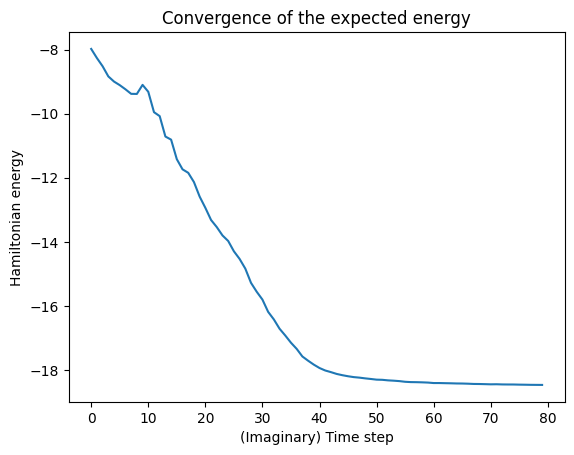

In [ ]:
%%time

# Set up your QITEvolver and evolve!
qit_evolver = QITEvolver(ham, ansatz)
qit_evolver.evolve(num_steps=80, lr=0.2, verbose=True) # lr was 0.5

# Visualize your results!
qit_evolver.plot_convergence()

In [ ]:
from qiskit_aer import AerSimulator

shots = 100_000

# Sample your optimized quantum state using Aer
backend = AerSimulator()
optimized_state = ansatz.assign_parameters(qit_evolver.param_vals[-1])
optimized_state.measure_all()
counts = backend.run(optimized_state, shots=shots).result().get_counts()

# Find the sampled bitstring with the largest cut value
cut_vals = sorted(((bs, compute_cut_size(graph, bs)) for bs in counts), key=lambda t: t[1])
best_bs = cut_vals[-1][0]

# Now find the most likely MaxCut solution as sampled from your optimized state
# We'll leave this part up to you!!!
most_likely_soln = ""

print(counts)

{'1100010111010011': 1, '1101010011000010': 1, '1100010111000010': 49, '1110000101010010': 3, '1101110111000010': 4, '1101010111010010': 94544, '0101010111110010': 1, '1101010011010010': 5, '1100010111010010': 1989, '1111010101010010': 2, '1101010111000010': 3187, '0101010111010010': 90, '1101010111011010': 2, '1101010110010010': 21, '1001010111010010': 6, '1110010101010010': 50, '1101010101010010': 25, '1100010101010010': 4, '1101010101000010': 1, '0100010111010010': 1, '1110010101000010': 2, '1101110011010010': 1, '1100000101010010': 1, '1100010110010010': 2, '0101010111000010': 2, '1111011111010010': 2, '1101010111010110': 2, '1101010110110010': 1, '1101010111110110': 1}


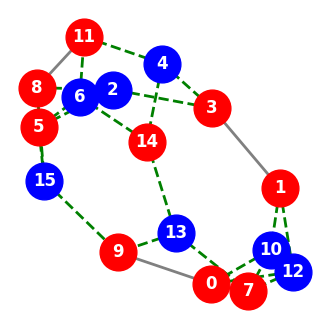

Cut value: 21
Graph with 16 nodes and 24 edges 1101010111010010


In [ ]:
interpret_solution(graph, best_bs)
print("Cut value: "+str(compute_cut_size(graph, best_bs)))
print(graph, best_bs)

In [ ]:
%%time
# Brute-force approach with conditional checks

verbose = False

G = graph
n = len(G.nodes())
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = 1.0
if verbose:
    print(w)

best_cost_brute = 0
best_cost_balanced = 0
best_cost_connected = 0

for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]

    # Create subgraphs based on the partition
    subgraph0 = G.subgraph([i for i, val in enumerate(x) if val == 0])
    subgraph1 = G.subgraph([i for i, val in enumerate(x) if val == 1])

    bs = "".join(str(i) for i in x)
    
    # Check if subgraphs are not empty
    if len(subgraph0.nodes) > 0 and len(subgraph1.nodes) > 0:
        cost = 0
        for i in range(n):
            for j in range(n):
                cost = cost + w[i, j] * x[i] * (1 - x[j])
        if best_cost_brute < cost:
            best_cost_brute = cost
            xbest_brute = x
            XS_brut = []
        if best_cost_brute == cost:
            XS_brut.append(bs)

        outstr = "case = " + str(x) + " cost = " + str(cost)

        if (len(subgraph1.nodes)-len(subgraph0.nodes))**2 <= 1:
            outstr += " balanced"
            if best_cost_balanced < cost:
                best_cost_balanced = cost
                xbest_balanced = x
                XS_balanced = []
            if best_cost_balanced == cost:
                XS_balanced.append(bs)

        if nx.is_connected(subgraph0) and nx.is_connected(subgraph1):
            outstr += " connected"
            if best_cost_connected < cost:
                best_cost_connected = cost
                xbest_connected = x
                XS_connected = []
            if best_cost_connected == cost:
                XS_connected.append(bs)
        if verbose:
            print(outstr)


CPU times: total: 11.6 s
Wall time: 11.8 s


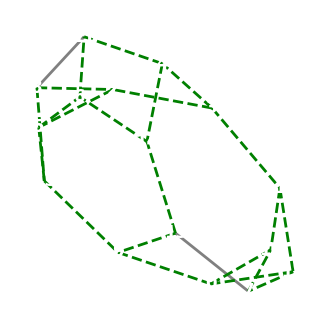

Graph with 16 nodes and 24 edges [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0]

Best solution = [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0] cost = 22.0
['0001010011111010', '1110101100000101']


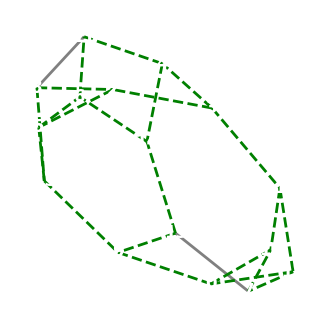

Graph with 16 nodes and 24 edges [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0]

Best balanced = [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0] cost = 22.0
['0001010011111010', '1110101100000101']


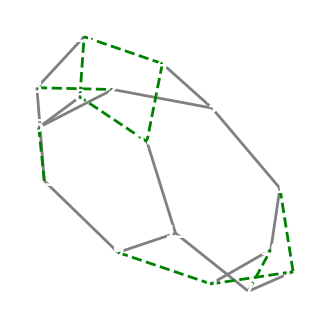

Graph with 16 nodes and 24 edges [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]

Best connected = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0] cost = 10.0
['1111111000100000', '0111111100100000', '1111110010100000', '1111011010100000', '0111110110100000', '0111011110100000', '1111110001100000', '1111011001100000', '1111100011100000', '1111110000110000', '1111101000110000', '1111011000110000', '1101111000110000', '0111110100110000', '0111101100110000', '0111011100110000', '0101111100110000', '1111010010110000', '1111001010110000', '1101101010110000', '0111010110110000', '0111001110110000', '0101101110110000', '1111100001110000', '1111000011110000', '1101100011110000', '1111111000001000', '0111111100001000', '1111110010001000', '1111011010001000', '0111110110001000', '0111011110001000', '1111110001001000', '1111011001001000', '1111100011001000', '0111111000101000', '0111110010101000', '0111011010101000', '1111110000011000', '1111101000011000', '1111011000011000', '1101111000011000'

In [ ]:
# This is classical brute force solver results:
interpret_solution(graph, xbest_brute)
print(graph, xbest_brute)
print("\nBest solution = " + str(xbest_brute) + " cost = " + str(best_cost_brute))
print(XS_brut)

interpret_solution(graph, xbest_balanced)
print(graph, xbest_balanced)
print("\nBest balanced = " + str(xbest_balanced) + " cost = " + str(best_cost_balanced))
print(XS_balanced)

interpret_solution(graph, xbest_connected)
print(graph, xbest_connected)
print("\nBest connected = " + str(xbest_connected) + " cost = " + str(best_cost_connected))
print(XS_connected)
plt.show()

In [ ]:
# And this is how we calculate the shots counted toward scores for each class of the problems

sum_counts = 0
for bs in counts:
    if bs in XS_brut:
        sum_counts += counts[bs]

print(f"Pure max-cut: {sum_counts} out of {shots}")

sum_balanced_counts = 0
for bs in counts:
    if bs in XS_balanced:
        sum_balanced_counts += counts[bs]

print(f"Balanced max-cut: {sum_balanced_counts} out of {shots}")

sum_connected_counts = 0
for bs in counts:
    if bs in XS_connected:
        sum_connected_counts += counts[bs]

print(f"Connected max-cut: {sum_connected_counts} out of {shots}")

Pure max-cut: 0 out of 100000
Balanced max-cut: 0 out of 100000
Connected max-cut: 0 out of 100000


In [ ]:
def final_score(graph, XS_brut,counts,shots,ansatz,challenge):

    if(challenge=='base'):
        sum_counts = 0
        for bs in counts:
            if bs in XS_brut:
                sum_counts += counts[bs]
    elif(challenge=='balanced'):
        sum_balanced_counts = 0
        for bs in counts:
            if bs in XS_balanced:
                sum_balanced_counts += counts[bs]        
        sum_counts = sum_balanced_counts
    elif(challenge=='connected'):
        sum_connected_counts = 0
        for bs in counts:
            if bs in XS_connected:
                sum_connected_counts += counts[bs]
        sum_counts = sum_connected_counts

    
    transpiled_ansatz = transpile(ansatz, basis_gates = ['cx','rz','sx','x'])
    cx_count = transpiled_ansatz.count_ops()['cx']
    score = (4*2*graph.number_of_edges())/(4*2*graph.number_of_edges() + cx_count) * sum_counts/shots

    return np.round(score,5)

In [ ]:
print("Base score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'base')))
print("Balanced score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'balanced')))
print("Connected score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'connected')))

Base score: 0.0
Balanced score: 0.0
Connected score: 0.0


## Graph6
Balanced score: 0.69536

In [ ]:
graph = graph6
graph

In [ ]:
# Visualization will be performed in the cells below;

def build_ansatz(graph: nx.Graph, layers: int = 2) -> QuantumCircuit:
    
    num_qubits = graph.number_of_nodes()
    qc = QuantumCircuit(num_qubits)
    
    qc.h(range(num_qubits)) # Uniform superposition using Hadamard gates

    for layer in range(layers):
        theta_ry = ParameterVector(f"theta_ry_{layer}", num_qubits) # Apply single-qubit parameterized rotations
        theta_rz = ParameterVector(f"theta_rz_{layer}", num_qubits) # Apply single-qubit parameterized rotations
        for q in range(num_qubits): # Rotation gates
            qc.ry(theta_ry[q], q)
            qc.rz(theta_rz[q], q)

        phi = ParameterVector(f"phi_{layer}", len(graph.edges())) # Entangling layer using CZ or CRX instead of CXs
        for edge_idx, (u, v) in enumerate(graph.edges()):
            qc.cz(u, v)  # Controlled-Z instead of two CXs
            qc.rz(phi[edge_idx], v)  # Parameterized rotation on one qubit

        qc.barrier()

    return qc



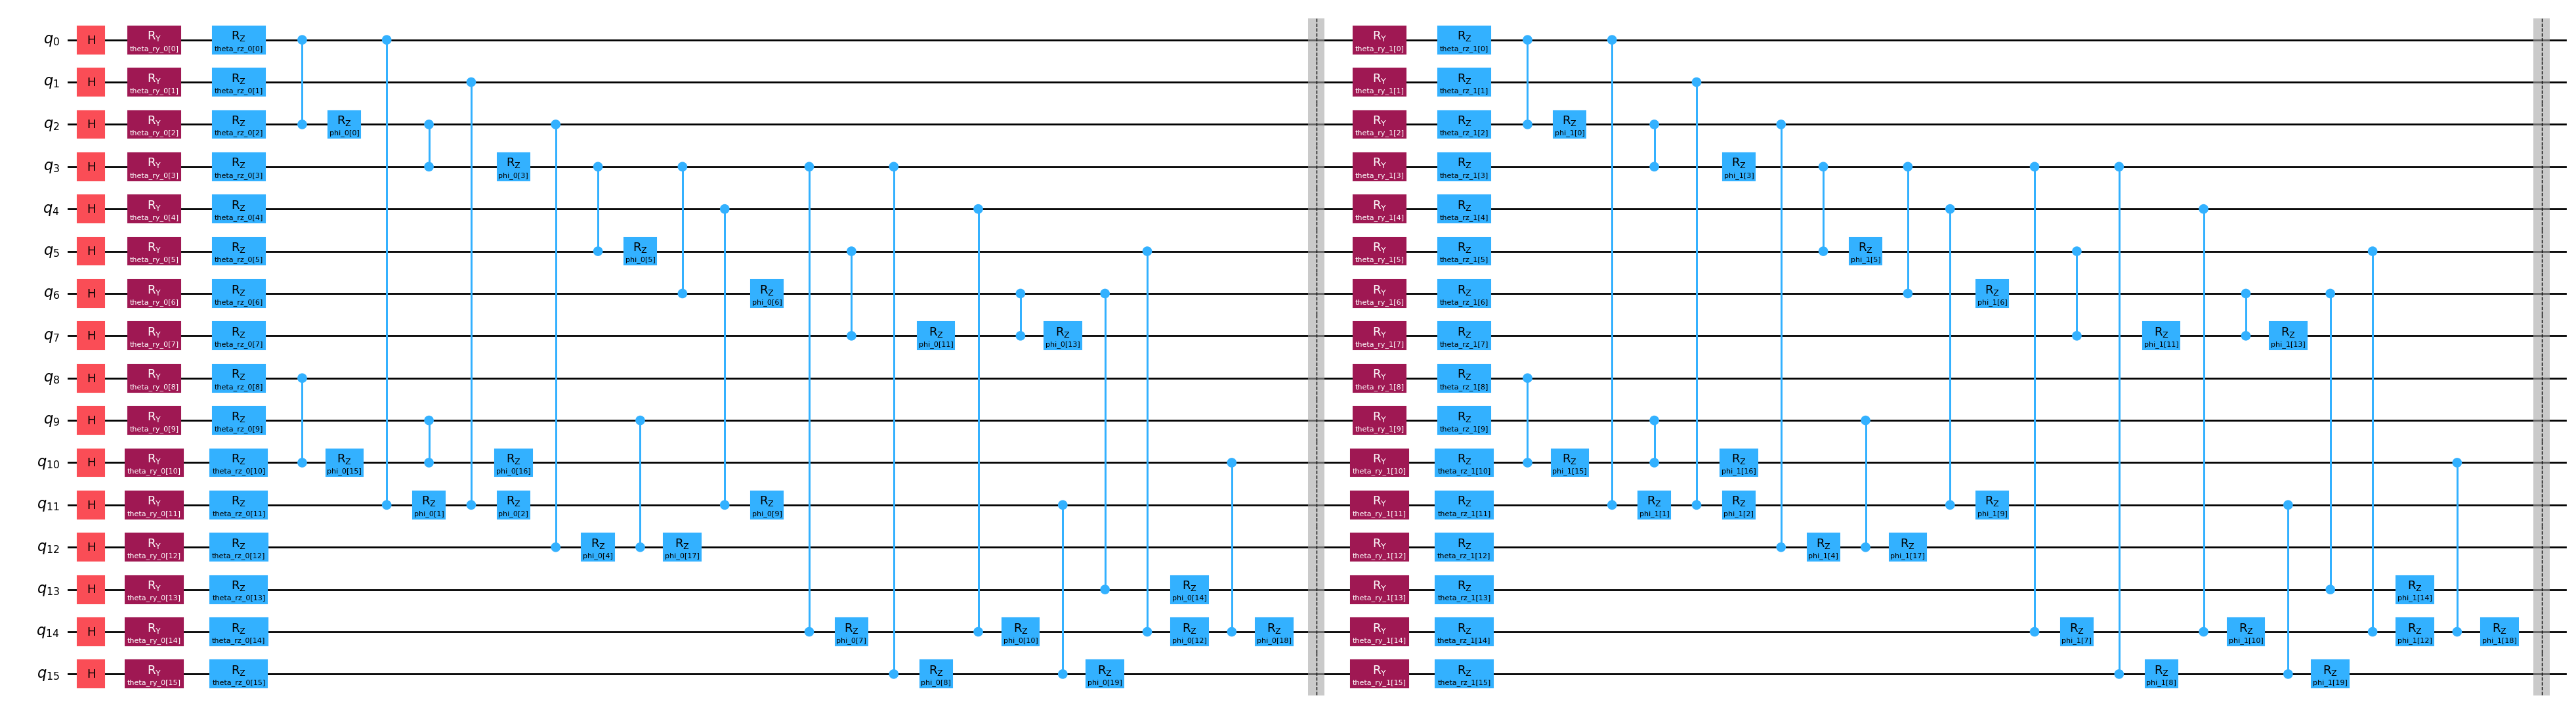

In [ ]:
ansatz = build_ansatz(graph)
ansatz.draw("mpl", fold=-1)

In [ ]:

def build_maxcut_hamiltonian(graph: nx.Graph) -> SparsePauliOp:
    """
    Build the MaxCut Hamiltonian for the given graph H = (|E|/2)*I - (1/2)*Σ_{(i,j)∈E}(Z_i Z_j)
    """
    num_qubits = len(graph.nodes)
    edges = list(graph.edges())
    num_edges = len(edges)

    pauli_terms = ["I"*num_qubits] # start with identity
    coeffs = [-num_edges / 2]

    for (u, v) in edges: # for each edge, add -(1/2)*Z_i Z_j
        z_term = ["I"] * num_qubits
        z_term[u] = "Z"
        z_term[v] = "Z"
        pauli_terms.append("".join(z_term))
        coeffs.append(0.5)

    # Balance part: (λ/4) * (N I + Σ_{i≠j} Z_i Z_j) -> We want nodes of graph subset to be balanced to num_qubits/2.
    # We want to sum nodes with index '1' and subtract it with num_qubits/2 and square it to see the positve squared difference.
    # This way, we can add the term to the original Hamiltonian for further optimization.

    lambda_balance = 1 # param
    pauli_terms.append("I" * num_qubits)
    coeffs.append(lambda_balance * num_qubits / 4)

    for i in range(num_qubits):
        for j in range(i + 1, num_qubits):
            zz_term = ["I"] * num_qubits
            zz_term[i] = "Z"
            zz_term[j] = "Z"
            pauli_terms.append("".join(zz_term))
            coeffs.append(lambda_balance / 4) # Z_i Z_j terms for all pairs of nodes
            
    return SparsePauliOp.from_list(list(zip(pauli_terms, coeffs)))


In [ ]:
ham = build_maxcut_hamiltonian(graph)
ham

SparsePauliOp(['IIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIII', 'ZIIIIIIIIIIZIIII', 'IZIIIIIIIIIZIIII', 'IIZZIIIIIIIIIIII', 'IIZIIIIIIIIIZIII', 'IIIZIZIIIIIIIIII', 'IIIZIIZIIIIIIIII', 'IIIZIIIIIIIIIIZI', 'IIIZIIIIIIIIIIIZ', 'IIIIZIIIIIIZIIII', 'IIIIZIIIIIIIIIZI', 'IIIIIZIZIIIIIIII', 'IIIIIZIIIIIIIIZI', 'IIIIIIZZIIIIIIII', 'IIIIIIZIIIIIIZII', 'IIIIIIIIZIZIIIII', 'IIIIIIIIIZZIIIII', 'IIIIIIIIIZIIZIII', 'IIIIIIIIIIZIIIZI', 'IIIIIIIIIIIZIIIZ', 'IIIIIIIIIIIIIIII', 'ZZIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIII', 'ZIIIZIIIIIIIIIII', 'ZIIIIZIIIIIIIIII', 'ZIIIIIZIIIIIIIII', 'ZIIIIIIZIIIIIIII', 'ZIIIIIIIZIIIIIII', 'ZIIIIIIIIZIIIIII', 'ZIIIIIIIIIZIIIII', 'ZIIIIIIIIIIZIIII', 'ZIIIIIIIIIIIZIII', 'ZIIIIIIIIIIIIZII', 'ZIIIIIIIIIIIIIZI', 'ZIIIIIIIIIIIIIIZ', 'IZZIIIIIIIIIIIII', 'IZIZIIIIIIIIIIII', 'IZIIZIIIIIIIIIII', 'IZIIIZIIIIIIIIII', 'IZIIIIZIIIIIIIII', 'IZIIIIIZIIIIIIII', 'IZIIIIIIZIIIIIII', 'IZIIIIIIIZIIIIII', 'IZIIIIIIIIZIIIII', 'IZIIIIIIIIIZIIII', 'IZIIIIIIIIIIZIII', 'IZIIIIIIIIIIIZII', 'IZII

In [ ]:
def compute_cut_size(graph, bitstring):
    """
    Get the cut size of the partition of ``graph`` described by the given
    ``bitstring``.
    """
    cut_sz = 0
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_sz += 1
    return cut_sz

In [ ]:
def get_ising_energies(
        operator: SparsePauliOp, 
        states: np.array
    ):
    """
    Get the energies of the given Ising ``operator`` that correspond to the
    given ``states``.
    """
    # Unroll Hamiltonian data into NumPy arrays
    paulis = np.array([list(ops) for ops, _ in operator.label_iter()]) != "I"
    coeffs = operator.coeffs.real
    
    # Vectorized energies computation
    energies = (-1) ** (states @ paulis.T) @ coeffs
    return energies

In [ ]:
def expected_energy(
        hamiltonian: SparsePauliOp,
        measurements: np.array
):
    """
    Compute the expected energy of the given ``hamiltonian`` with respect to
    the observed ``measurement``.

    The latter is assumed to by a NumPy records array with fields ``states``
    --describing the observed bit-strings as an integer array-- and ``counts``,
    describing the corresponding observed frequency of each state.
    """
    energies = get_ising_energies(hamiltonian, measurements["states"])
    return np.dot(energies, measurements["counts"]) / measurements["counts"].sum()

In [ ]:
def interpret_solution(graph, bitstring):
    """
    Visualize the given ``bitstring`` as a partition of the given ``graph``.
    """
    pos = nx.spring_layout(graph, seed=42)
    set_0 = [i for i, b in enumerate(bitstring) if b == '0']
    set_1 = [i for i, b in enumerate(bitstring) if b == '1']

    plt.figure(figsize=(4, 4))
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_0, node_color='blue', node_size=700)
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_1, node_color='red', node_size=700)

    cut_edges = []
    non_cut_edges = []
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_edges.append((u, v))
        else:
            non_cut_edges.append((u, v))

    nx.draw_networkx_edges(graph, pos=pos, edgelist=non_cut_edges, edge_color='gray', width=2)
    nx.draw_networkx_edges(graph, pos=pos, edgelist=cut_edges, edge_color='green', width=2, style='dashed')

    nx.draw_networkx_labels(graph, pos=pos, font_color='white', font_weight='bold')
    plt.axis('off')
    plt.show()

In [ ]:
class QITEvolver:
    """
    A class to evolve a parametrized quantum state under the action of an Ising
    Hamiltonian according to the variational Quantum Imaginary Time Evolution
    (QITE) principle described in IonQ's latest joint paper with ORNL.
    """
    def __init__(self, hamiltonian: SparsePauliOp, ansatz: QuantumCircuit):
        self.hamiltonian = hamiltonian
        self.ansatz = ansatz

        # Define some constants
        self.backend = AerSimulator()
        self.num_shots = 10000
        self.energies, self.param_vals, self.runtime = list(), list(), list()

    def evolve(self, num_steps: int, lr: float = 0.4, verbose: bool = True):
        """
        Evolve the variational quantum state encoded by ``self.ansatz`` under
        the action of ``self.hamiltonian`` according to varQITE.
        """
        curr_params = np.zeros(self.ansatz.num_parameters)
        for k in range(num_steps):
            # Get circuits and measure on backend
            iter_qc = self.get_iteration_circuits(curr_params)
            job = self.backend.run(iter_qc, shots=self.num_shots)
            q0 = time.time()
            measurements = job.result().get_counts()
            quantum_exec_time = time.time() - q0

            # Update parameters-- set up defining ODE and step forward
            Gmat, dvec, curr_energy = self.get_defining_ode(measurements)
            dcurr_params = np.linalg.lstsq(Gmat, dvec, rcond=1e-2)[0]
            curr_params += lr * dcurr_params

            # Progress checkpoint!
            if verbose:
                self.print_status(measurements)
            self.energies.append(curr_energy)
            self.param_vals.append(curr_params.copy())
            self.runtime.append(quantum_exec_time)

    def get_defining_ode(self, measurements: List[dict[str, int]]):
        """
        Construct the dynamics matrix and load vector defining the varQITE
        iteration.
        """
        # Load sampled bitstrings and corresponding frequencies into NumPy arrays
        dtype = np.dtype([("states", int, (self.ansatz.num_qubits,)), ("counts", "f")])
        measurements = [np.fromiter(map(lambda kv: (list(kv[0]), kv[1]), res.items()), dtype) for res in measurements]

        # Set up the dynamics matrix by computing the gradient of each Pauli word
        # with respect to each parameter in the ansatz using the parameter-shift rule
        pauli_terms = [SparsePauliOp(op) for op, _ in self.hamiltonian.label_iter() if set(op) != set("I")]
        Gmat = np.zeros((len(pauli_terms), self.ansatz.num_parameters))
        for i, pauli_word in enumerate(pauli_terms):
            for j, jth_pair in enumerate(zip(measurements[1::2], measurements[2::2])):
                for pm, pm_shift in enumerate(jth_pair):
                    Gmat[i, j] += (-1)**pm * expected_energy(pauli_word, pm_shift)
        
        # Set up the load vector
        curr_energy = expected_energy(self.hamiltonian, measurements[0])
        dvec = np.zeros(len(pauli_terms))
        for i, pauli_word in enumerate(pauli_terms):
            rhs_op_energies = get_ising_energies(pauli_word, measurements[0]["states"])
            rhs_op_energies *= get_ising_energies(self.hamiltonian, measurements[0]["states"]) - curr_energy
            dvec[i] = -np.dot(rhs_op_energies, measurements[0]["counts"]) / self.num_shots
        return Gmat, dvec, curr_energy

    def get_iteration_circuits(self, curr_params: np.array):
        """
        Get the bound circuits that need to be evaluated to step forward
        according to QITE.
        """
        # Use this circuit to estimate your Hamiltonian's expected value
        circuits = [self.ansatz.assign_parameters(curr_params)]

        # Use these circuits to compute gradients
        for k in np.arange(curr_params.shape[0]):
            for j in range(2):
                pm_shift = curr_params.copy()
                pm_shift[k] += (-1)**j * np.pi/2
                circuits += [self.ansatz.assign_parameters(pm_shift)]
        
        # Add measurement gates and return
        [qc.measure_all() for qc in circuits]
        return circuits
    
    def plot_convergence(self):
        """
        Plot the convergence of the expected value of ``self.hamiltonian`` with
        respect to the (imaginary) time steps.
        """
        plt.plot(self.energies)
        plt.xlabel("(Imaginary) Time step")
        plt.ylabel("Hamiltonian energy")
        plt.title("Convergence of the expected energy")

    def print_status(self, measurements):
        """
        Print summary statistics describing a QITE run.
        """
        stats = pd.DataFrame({
            "curr_energy": self.energies,
            "num_circuits": [len(measurements)] * len(self.energies),
            "quantum_exec_time": self.runtime 
        })
        stats.index.name = "step"
        display.clear_output(wait=True)
        display.display(stats)

,curr_energy,num_circuits,quantum_exec_time
step,,,
0,-6.00980,209,23.733919
1,-4.60940,209,14.656499
2,-5.67575,209,11.667685
3,-6.62000,209,12.266952
4,-6.79135,209,12.907993
5,-7.00100,209,12.813322
6,-7.31445,209,15.083953
7,-7.19080,209,17.764162
8,-7.17160,209,17.569766


CPU times: total: 48min 5s
Wall time: 23min 17s


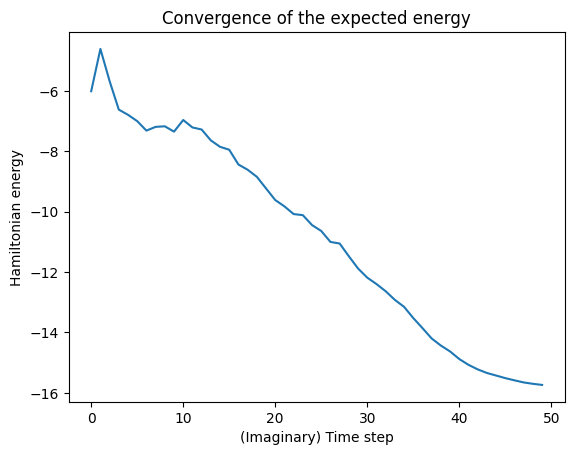

In [ ]:
%%time

# Set up your QITEvolver and evolve!
qit_evolver = QITEvolver(ham, ansatz)
qit_evolver.evolve(num_steps=50, lr=0.2, verbose=True) # lr was 0.5

# Visualize your results!
qit_evolver.plot_convergence()

In [ ]:
from qiskit_aer import AerSimulator

shots = 100_000

# Sample your optimized quantum state using Aer
backend = AerSimulator()
optimized_state = ansatz.assign_parameters(qit_evolver.param_vals[-1])
optimized_state.measure_all()
counts = backend.run(optimized_state, shots=shots).result().get_counts()

# Find the sampled bitstring with the largest cut value
cut_vals = sorted(((bs, compute_cut_size(graph, bs)) for bs in counts), key=lambda t: t[1])
best_bs = cut_vals[-1][0]

# Now find the most likely MaxCut solution as sampled from your optimized state
# We'll leave this part up to you!!!
most_likely_soln = ""

print(counts)

{'1000111010101001': 192, '1100111000101001': 86920, '0100011000101011': 9, '1100111010101001': 3101, '1000111000101001': 5338, '1101111000101001': 942, '1101110100101101': 3, '1001110000101101': 47, '1100111000101101': 1127, '0100111000101001': 224, '1101110000101101': 644, '1000111010101011': 2, '1101110010101101': 31, '1100111000101011': 151, '0100111100101001': 2, '1100111010001001': 63, '1110111000101001': 342, '1101111000101101': 70, '1001110010101101': 1, '1100111010101101': 38, '1100011000101011': 24, '1100101000101001': 42, '1000111000101101': 74, '1100110000101001': 50, '1001111000101001': 50, '1000101000101001': 3, '1000111000111001': 25, '0100011000111011': 1, '1100100100101001': 7, '1100111001101001': 2, '1101111010101001': 31, '1000111100101001': 4, '1110111000101101': 6, '1100111100101001': 111, '1010111000101001': 17, '1000110000101001': 6, '1101110000101111': 1, '0000011000101011': 2, '1000111010001001': 6, '1100011000101001': 33, '1101011010101001': 1, '11101110101010

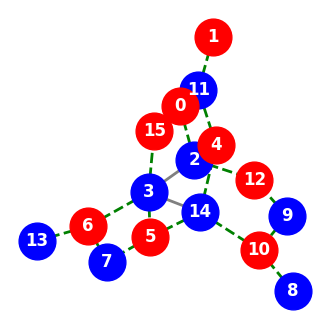

Cut value: 18
Graph with 16 nodes and 20 edges 1100111000101001


In [ ]:
interpret_solution(graph, best_bs)
print("Cut value: "+str(compute_cut_size(graph, best_bs)))
print(graph, best_bs)

In [ ]:
%%time
# Brute-force approach with conditional checks

verbose = False

G = graph
n = len(G.nodes())
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = 1.0
if verbose:
    print(w)

best_cost_brute = 0
best_cost_balanced = 0
best_cost_connected = 0

for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]

    # Create subgraphs based on the partition
    subgraph0 = G.subgraph([i for i, val in enumerate(x) if val == 0])
    subgraph1 = G.subgraph([i for i, val in enumerate(x) if val == 1])

    bs = "".join(str(i) for i in x)
    
    # Check if subgraphs are not empty
    if len(subgraph0.nodes) > 0 and len(subgraph1.nodes) > 0:
        cost = 0
        for i in range(n):
            for j in range(n):
                cost = cost + w[i, j] * x[i] * (1 - x[j])
        if best_cost_brute < cost:
            best_cost_brute = cost
            xbest_brute = x
            XS_brut = []
        if best_cost_brute == cost:
            XS_brut.append(bs)

        outstr = "case = " + str(x) + " cost = " + str(cost)

        if (len(subgraph1.nodes)-len(subgraph0.nodes))**2 <= 1:
            outstr += " balanced"
            if best_cost_balanced < cost:
                best_cost_balanced = cost
                xbest_balanced = x
                XS_balanced = []
            if best_cost_balanced == cost:
                XS_balanced.append(bs)

        if nx.is_connected(subgraph0) and nx.is_connected(subgraph1):
            outstr += " connected"
            if best_cost_connected < cost:
                best_cost_connected = cost
                xbest_connected = x
                XS_connected = []
            if best_cost_connected == cost:
                XS_connected.append(bs)
        if verbose:
            print(outstr)


CPU times: total: 11.2 s
Wall time: 11.4 s


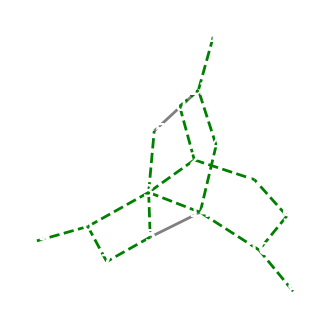

Graph with 16 nodes and 20 edges [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0]

Best solution = [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0] cost = 18.0
['1101100100101100', '0010011011010010', '0011000111010110', '1100111000101001', '1101100100101101', '0010011011010011']


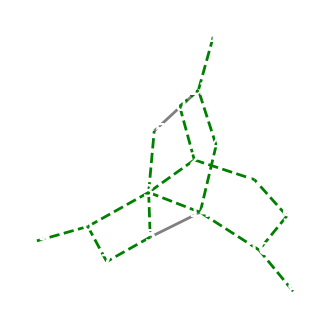

Graph with 16 nodes and 20 edges [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0]

Best balanced = [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0] cost = 18.0
['1101100100101100', '0011000111010110', '1100111000101001', '0010011011010011']


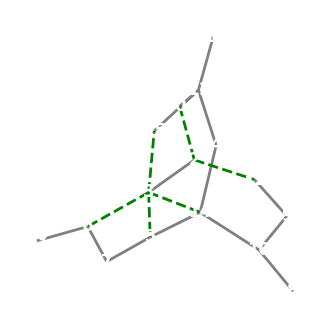

Graph with 16 nodes and 20 edges [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Best connected = [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 6.0
['0011000000000000', '1011000000000000', '0011000000001000', '1011000000001000', '0011000001001000', '1011000001001000', '0011000011101000', '1011000011101000', '0011001000000100', '1011001000000100', '0011001100000100', '1011001100000100', '0011001000001100', '1011001000001100', '0011001100001100', '1011001100001100', '0011001001001100', '1011001001001100', '0011001101001100', '1011001101001100', '0011001011101100', '1011001011101100', '0011001111101100', '1011001111101100', '0100110000010010', '1100110000010010', '0100110100010010', '1100110100010010', '0100110010110010', '1100110010110010', '0100110110110010', '1100110110110010', '0100110011110010', '1100110011110010', '0100110111110010', '1100110111110010', '0010010011101010', '1010010011101010', '0010110011101010', '1010110011101010', '0010010111101010', '1010010111101010',

In [ ]:
# This is classical brute force solver results:
interpret_solution(graph, xbest_brute)
print(graph, xbest_brute)
print("\nBest solution = " + str(xbest_brute) + " cost = " + str(best_cost_brute))
print(XS_brut)

interpret_solution(graph, xbest_balanced)
print(graph, xbest_balanced)
print("\nBest balanced = " + str(xbest_balanced) + " cost = " + str(best_cost_balanced))
print(XS_balanced)

interpret_solution(graph, xbest_connected)
print(graph, xbest_connected)
print("\nBest connected = " + str(xbest_connected) + " cost = " + str(best_cost_connected))
print(XS_connected)
plt.show()

In [ ]:
# And this is how we calculate the shots counted toward scores for each class of the problems

sum_counts = 0
for bs in counts:
    if bs in XS_brut:
        sum_counts += counts[bs]

print(f"Pure max-cut: {sum_counts} out of {shots}")

sum_balanced_counts = 0
for bs in counts:
    if bs in XS_balanced:
        sum_balanced_counts += counts[bs]

print(f"Balanced max-cut: {sum_balanced_counts} out of {shots}")

sum_connected_counts = 0
for bs in counts:
    if bs in XS_connected:
        sum_connected_counts += counts[bs]

print(f"Connected max-cut: {sum_connected_counts} out of {shots}")

Pure max-cut: 86920 out of 100000
Balanced max-cut: 86920 out of 100000
Connected max-cut: 0 out of 100000


In [ ]:
def final_score(graph, XS_brut,counts,shots,ansatz,challenge):

    if(challenge=='base'):
        sum_counts = 0
        for bs in counts:
            if bs in XS_brut:
                sum_counts += counts[bs]
    elif(challenge=='balanced'):
        sum_balanced_counts = 0
        for bs in counts:
            if bs in XS_balanced:
                sum_balanced_counts += counts[bs]        
        sum_counts = sum_balanced_counts
    elif(challenge=='connected'):
        sum_connected_counts = 0
        for bs in counts:
            if bs in XS_connected:
                sum_connected_counts += counts[bs]
        sum_counts = sum_connected_counts

    
    transpiled_ansatz = transpile(ansatz, basis_gates = ['cx','rz','sx','x'])
    cx_count = transpiled_ansatz.count_ops()['cx']
    score = (4*2*graph.number_of_edges())/(4*2*graph.number_of_edges() + cx_count) * sum_counts/shots

    return np.round(score,5)

In [ ]:
print("Base score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'base')))
print("Balanced score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'balanced')))
print("Connected score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'connected')))

Base score: 0.69536
Balanced score: 0.69536
Connected score: 0.0


## Graph7
Balanced score: 0.78765

In [ ]:
graph = graph7
graph

In [ ]:
# Visualization will be performed in the cells below;

def build_ansatz(graph: nx.Graph, layers: int = 2) -> QuantumCircuit:
    
    num_qubits = graph.number_of_nodes()
    qc = QuantumCircuit(num_qubits)
    
    qc.h(range(num_qubits)) # Uniform superposition using Hadamard gates

    for layer in range(layers):
        theta_ry = ParameterVector(f"theta_ry_{layer}", num_qubits) # Apply single-qubit parameterized rotations
        theta_rz = ParameterVector(f"theta_rz_{layer}", num_qubits) # Apply single-qubit parameterized rotations
        for q in range(num_qubits): # Rotation gates
            qc.ry(theta_ry[q], q)
            qc.rz(theta_rz[q], q)

        phi = ParameterVector(f"phi_{layer}", len(graph.edges())) # Entangling layer using CZ or CRX instead of CXs
        for edge_idx, (u, v) in enumerate(graph.edges()):
            qc.cz(u, v)  # Controlled-Z instead of two CXs
            qc.rz(phi[edge_idx], v)  # Parameterized rotation on one qubit

        qc.barrier()

    return qc


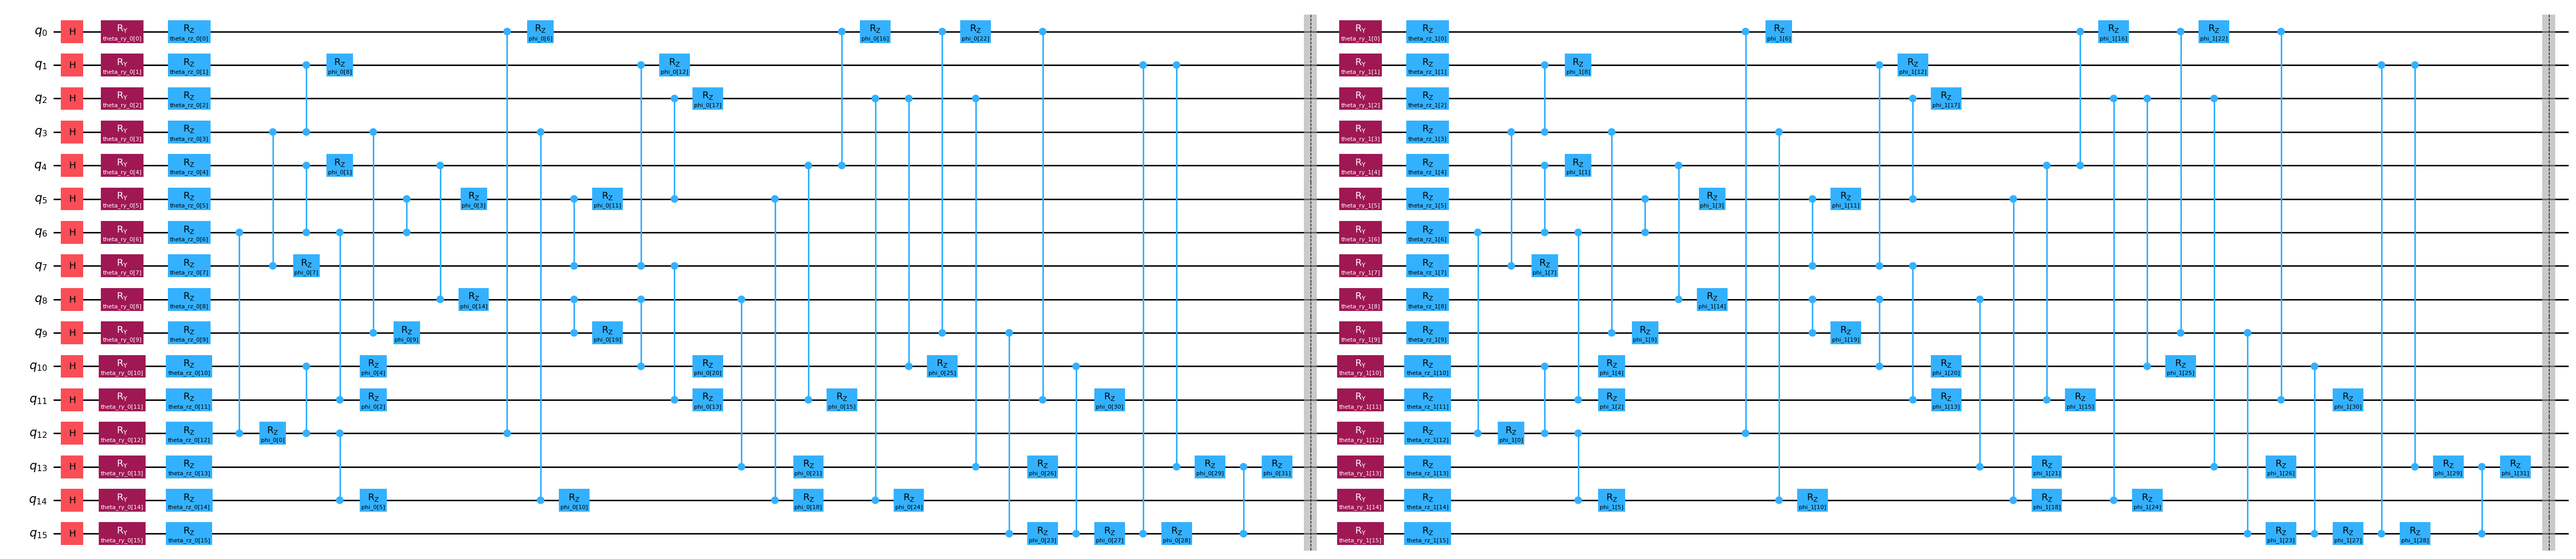

In [ ]:
ansatz = build_ansatz(graph)
ansatz.draw("mpl", fold=-1)

In [ ]:

def build_maxcut_hamiltonian(graph: nx.Graph) -> SparsePauliOp:
    """
    Build the MaxCut Hamiltonian for the given graph H = (|E|/2)*I - (1/2)*Σ_{(i,j)∈E}(Z_i Z_j)
    """
    num_qubits = len(graph.nodes)
    edges = list(graph.edges())
    num_edges = len(edges)

    pauli_terms = ["I"*num_qubits] # start with identity
    coeffs = [-num_edges / 2]

    for (u, v) in edges: # for each edge, add -(1/2)*Z_i Z_j
        z_term = ["I"] * num_qubits
        z_term[u] = "Z"
        z_term[v] = "Z"
        pauli_terms.append("".join(z_term))
        coeffs.append(0.5)

    # Balance part: (λ/4) * (N I + Σ_{i≠j} Z_i Z_j) -> We want nodes of graph subset to be balanced to num_qubits/2.
    # We want to sum nodes with index '1' and subtract it with num_qubits/2 and square it to see the positve squared difference.
    # This way, we can add the term to the original Hamiltonian for further optimization.

    lambda_balance = 1 # param
    pauli_terms.append("I" * num_qubits)
    coeffs.append(lambda_balance * num_qubits / 4)

    for i in range(num_qubits):
        for j in range(i + 1, num_qubits):
            zz_term = ["I"] * num_qubits
            zz_term[i] = "Z"
            zz_term[j] = "Z"
            pauli_terms.append("".join(zz_term))
            coeffs.append(lambda_balance / 4) # Z_i Z_j terms for all pairs of nodes
            
    return SparsePauliOp.from_list(list(zip(pauli_terms, coeffs)))


In [ ]:
ham = build_maxcut_hamiltonian(graph)
ham

SparsePauliOp(['IIIIIIIIIIIIIIII', 'IIIIIIZIIIIIZIII', 'IIIIZIZIIIIIIIII', 'IIIIIIZIIIIZIIII', 'IIIIIZZIIIIIIIII', 'IIIIIIIIIIZIZIII', 'IIIIIIIIIIIIZIZI', 'ZIIIIIIIIIIIZIII', 'IIIZIIIZIIIIIIII', 'IZIZIIIIIIIIIIII', 'IIIZIIIIIZIIIIII', 'IIIZIIIIIIIIIIZI', 'IIIIIZIZIIIIIIII', 'IZIIIIIZIIIIIIII', 'IIIIIIIZIIIZIIII', 'IIIIZIIIZIIIIIII', 'IIIIZIIIIIIZIIII', 'ZIIIZIIIIIIIIIII', 'IIZIIZIIIIIIIIII', 'IIIIIZIIIIIIIIZI', 'IIIIIIIIZZIIIIII', 'IIIIIIIIZIZIIIII', 'IIIIIIIIZIIIIZII', 'ZIIIIIIIIZIIIIII', 'IIIIIIIIIZIIIIIZ', 'IIZIIIIIIIIIIIZI', 'IIZIIIIIIIZIIIII', 'IIZIIIIIIIIIIZII', 'IIIIIIIIIIZIIIIZ', 'IZIIIIIIIIIIIIIZ', 'IZIIIIIIIIIIIZII', 'ZIIIIIIIIIIZIIII', 'IIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIIIII', 'ZZIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIII', 'ZIIIZIIIIIIIIIII', 'ZIIIIZIIIIIIIIII', 'ZIIIIIZIIIIIIIII', 'ZIIIIIIZIIIIIIII', 'ZIIIIIIIZIIIIIII', 'ZIIIIIIIIZIIIIII', 'ZIIIIIIIIIZIIIII', 'ZIIIIIIIIIIZIIII', 'ZIIIIIIIIIIIZIII', 'ZIIIIIIIIIIIIZII', 'ZIIIIIIIIIIIIIZI', 'ZIIIIIIIIIIIIIIZ', 'IZZI

In [ ]:
def compute_cut_size(graph, bitstring):
    """
    Get the cut size of the partition of ``graph`` described by the given
    ``bitstring``.
    """
    cut_sz = 0
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_sz += 1
    return cut_sz

In [ ]:
def get_ising_energies(
        operator: SparsePauliOp, 
        states: np.array
    ):
    """
    Get the energies of the given Ising ``operator`` that correspond to the
    given ``states``.
    """
    # Unroll Hamiltonian data into NumPy arrays
    paulis = np.array([list(ops) for ops, _ in operator.label_iter()]) != "I"
    coeffs = operator.coeffs.real
    
    # Vectorized energies computation
    energies = (-1) ** (states @ paulis.T) @ coeffs
    return energies

In [ ]:
def expected_energy(
        hamiltonian: SparsePauliOp,
        measurements: np.array
):
    """
    Compute the expected energy of the given ``hamiltonian`` with respect to
    the observed ``measurement``.

    The latter is assumed to by a NumPy records array with fields ``states``
    --describing the observed bit-strings as an integer array-- and ``counts``,
    describing the corresponding observed frequency of each state.
    """
    energies = get_ising_energies(hamiltonian, measurements["states"])
    return np.dot(energies, measurements["counts"]) / measurements["counts"].sum()

In [ ]:
def interpret_solution(graph, bitstring):
    """
    Visualize the given ``bitstring`` as a partition of the given ``graph``.
    """
    pos = nx.spring_layout(graph, seed=42)
    set_0 = [i for i, b in enumerate(bitstring) if b == '0']
    set_1 = [i for i, b in enumerate(bitstring) if b == '1']

    plt.figure(figsize=(4, 4))
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_0, node_color='blue', node_size=700)
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_1, node_color='red', node_size=700)

    cut_edges = []
    non_cut_edges = []
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_edges.append((u, v))
        else:
            non_cut_edges.append((u, v))

    nx.draw_networkx_edges(graph, pos=pos, edgelist=non_cut_edges, edge_color='gray', width=2)
    nx.draw_networkx_edges(graph, pos=pos, edgelist=cut_edges, edge_color='green', width=2, style='dashed')

    nx.draw_networkx_labels(graph, pos=pos, font_color='white', font_weight='bold')
    plt.axis('off')
    plt.show()

In [ ]:
class QITEvolver:
    """
    A class to evolve a parametrized quantum state under the action of an Ising
    Hamiltonian according to the variational Quantum Imaginary Time Evolution
    (QITE) principle described in IonQ's latest joint paper with ORNL.
    """
    def __init__(self, hamiltonian: SparsePauliOp, ansatz: QuantumCircuit):
        self.hamiltonian = hamiltonian
        self.ansatz = ansatz

        # Define some constants
        self.backend = AerSimulator()
        self.num_shots = 10000
        self.energies, self.param_vals, self.runtime = list(), list(), list()

    def evolve(self, num_steps: int, lr: float = 0.4, verbose: bool = True):
        """
        Evolve the variational quantum state encoded by ``self.ansatz`` under
        the action of ``self.hamiltonian`` according to varQITE.
        """
        curr_params = np.zeros(self.ansatz.num_parameters)
        for k in range(num_steps):
            # Get circuits and measure on backend
            iter_qc = self.get_iteration_circuits(curr_params)
            job = self.backend.run(iter_qc, shots=self.num_shots)
            q0 = time.time()
            measurements = job.result().get_counts()
            quantum_exec_time = time.time() - q0

            # Update parameters-- set up defining ODE and step forward
            Gmat, dvec, curr_energy = self.get_defining_ode(measurements)
            dcurr_params = np.linalg.lstsq(Gmat, dvec, rcond=1e-2)[0]
            curr_params += lr * dcurr_params

            # Progress checkpoint!
            if verbose:
                self.print_status(measurements)
            self.energies.append(curr_energy)
            self.param_vals.append(curr_params.copy())
            self.runtime.append(quantum_exec_time)

    def get_defining_ode(self, measurements: List[dict[str, int]]):
        """
        Construct the dynamics matrix and load vector defining the varQITE
        iteration.
        """
        # Load sampled bitstrings and corresponding frequencies into NumPy arrays
        dtype = np.dtype([("states", int, (self.ansatz.num_qubits,)), ("counts", "f")])
        measurements = [np.fromiter(map(lambda kv: (list(kv[0]), kv[1]), res.items()), dtype) for res in measurements]

        # Set up the dynamics matrix by computing the gradient of each Pauli word
        # with respect to each parameter in the ansatz using the parameter-shift rule
        pauli_terms = [SparsePauliOp(op) for op, _ in self.hamiltonian.label_iter() if set(op) != set("I")]
        Gmat = np.zeros((len(pauli_terms), self.ansatz.num_parameters))
        for i, pauli_word in enumerate(pauli_terms):
            for j, jth_pair in enumerate(zip(measurements[1::2], measurements[2::2])):
                for pm, pm_shift in enumerate(jth_pair):
                    Gmat[i, j] += (-1)**pm * expected_energy(pauli_word, pm_shift)
        
        # Set up the load vector
        curr_energy = expected_energy(self.hamiltonian, measurements[0])
        dvec = np.zeros(len(pauli_terms))
        for i, pauli_word in enumerate(pauli_terms):
            rhs_op_energies = get_ising_energies(pauli_word, measurements[0]["states"])
            rhs_op_energies *= get_ising_energies(self.hamiltonian, measurements[0]["states"]) - curr_energy
            dvec[i] = -np.dot(rhs_op_energies, measurements[0]["counts"]) / self.num_shots
        return Gmat, dvec, curr_energy

    def get_iteration_circuits(self, curr_params: np.array):
        """
        Get the bound circuits that need to be evaluated to step forward
        according to QITE.
        """
        # Use this circuit to estimate your Hamiltonian's expected value
        circuits = [self.ansatz.assign_parameters(curr_params)]

        # Use these circuits to compute gradients
        for k in np.arange(curr_params.shape[0]):
            for j in range(2):
                pm_shift = curr_params.copy()
                pm_shift[k] += (-1)**j * np.pi/2
                circuits += [self.ansatz.assign_parameters(pm_shift)]
        
        # Add measurement gates and return
        [qc.measure_all() for qc in circuits]
        return circuits
    
    def plot_convergence(self):
        """
        Plot the convergence of the expected value of ``self.hamiltonian`` with
        respect to the (imaginary) time steps.
        """
        plt.plot(self.energies)
        plt.xlabel("(Imaginary) Time step")
        plt.ylabel("Hamiltonian energy")
        plt.title("Convergence of the expected energy")

    def print_status(self, measurements):
        """
        Print summary statistics describing a QITE run.
        """
        stats = pd.DataFrame({
            "curr_energy": self.energies,
            "num_circuits": [len(measurements)] * len(self.energies),
            "quantum_exec_time": self.runtime 
        })
        stats.index.name = "step"
        display.clear_output(wait=True)
        display.display(stats)

,curr_energy,num_circuits,quantum_exec_time
step,,,
0,-11.96630,257,24.641253
1,-13.29900,257,22.994591
2,-14.45350,257,20.126190
3,-15.21885,257,18.658664
4,-15.42655,257,15.543785
5,-16.21495,257,14.886353
6,-16.78150,257,15.512878
7,-17.00110,257,19.159092
8,-17.51310,257,15.030116


CPU times: total: 59min 5s
Wall time: 19min 25s


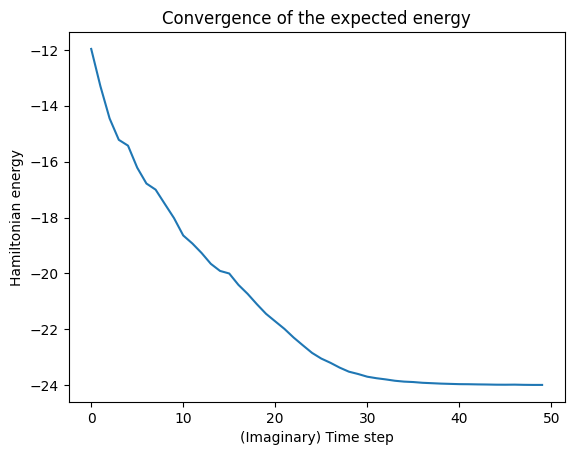

In [ ]:
%%time

# Set up your QITEvolver and evolve!
qit_evolver = QITEvolver(ham, ansatz)
qit_evolver.evolve(num_steps=50, lr=0.2, verbose=True) # lr was 0.5

# Visualize your results!
qit_evolver.plot_convergence()

In [ ]:
from qiskit_aer import AerSimulator

shots = 100_000

# Sample your optimized quantum state using Aer
backend = AerSimulator()
optimized_state = ansatz.assign_parameters(qit_evolver.param_vals[-1])
optimized_state.measure_all()
counts = backend.run(optimized_state, shots=shots).result().get_counts()

# Find the sampled bitstring with the largest cut value
cut_vals = sorted(((bs, compute_cut_size(graph, bs)) for bs in counts), key=lambda t: t[1])
best_bs = cut_vals[-1][0]

# Now find the most likely MaxCut solution as sampled from your optimized state
# We'll leave this part up to you!!!
most_likely_soln = ""

print(counts)

{'0100110001110110': 98333, '0001110001110110': 39, '0100010001110110': 7, '0100110001111110': 1327, '0101110001110110': 19, '0000110001111100': 51, '0100110001110100': 60, '0100110001111100': 123, '0100110001110010': 1, '0110110101110100': 1, '0100110001100110': 6, '0000110001111110': 6, '0100110001010110': 8, '0000110001010110': 5, '0110110001110100': 1, '0100110000110110': 1, '1100110001110110': 5, '0001110001110111': 1, '0000110001110110': 1, '0100110001110111': 1, '0100110011110100': 1, '0100110101110110': 1, '0100110101100110': 1, '0100100101110110': 1}


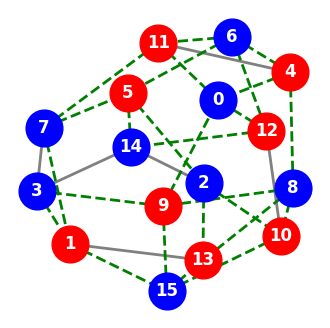

Cut value: 26
Graph with 16 nodes and 32 edges 0100110001111100


In [ ]:
interpret_solution(graph, best_bs)
print("Cut value: "+str(compute_cut_size(graph, best_bs)))
print(graph, best_bs)

In [ ]:
%%time
# Brute-force approach with conditional checks

verbose = False

G = graph
n = len(G.nodes())
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = 1.0
if verbose:
    print(w)

best_cost_brute = 0
best_cost_balanced = 0
best_cost_connected = 0

for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]

    # Create subgraphs based on the partition
    subgraph0 = G.subgraph([i for i, val in enumerate(x) if val == 0])
    subgraph1 = G.subgraph([i for i, val in enumerate(x) if val == 1])

    bs = "".join(str(i) for i in x)
    
    # Check if subgraphs are not empty
    if len(subgraph0.nodes) > 0 and len(subgraph1.nodes) > 0:
        cost = 0
        for i in range(n):
            for j in range(n):
                cost = cost + w[i, j] * x[i] * (1 - x[j])
        if best_cost_brute < cost:
            best_cost_brute = cost
            xbest_brute = x
            XS_brut = []
        if best_cost_brute == cost:
            XS_brut.append(bs)

        outstr = "case = " + str(x) + " cost = " + str(cost)

        if (len(subgraph1.nodes)-len(subgraph0.nodes))**2 <= 1:
            outstr += " balanced"
            if best_cost_balanced < cost:
                best_cost_balanced = cost
                xbest_balanced = x
                XS_balanced = []
            if best_cost_balanced == cost:
                XS_balanced.append(bs)

        if nx.is_connected(subgraph0) and nx.is_connected(subgraph1):
            outstr += " connected"
            if best_cost_connected < cost:
                best_cost_connected = cost
                xbest_connected = x
                XS_connected = []
            if best_cost_connected == cost:
                XS_connected.append(bs)
        if verbose:
            print(outstr)


CPU times: total: 24 s
Wall time: 25.7 s


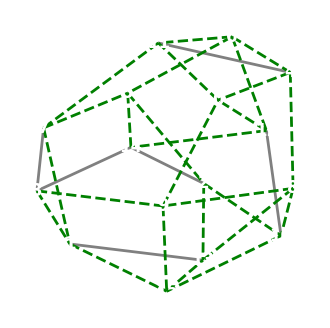

Graph with 16 nodes and 32 edges [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]

Best solution = [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0] cost = 26.0
['0100110001111100', '0001110001111100', '0101110001111100', '1000001101100110', '1100001101100110', '0000101101100110', '1000101101100110', '0100101101100110', '1100101101100110', '0100110001110110', '0100110001111110', '1011001110000001', '1011001110001001', '0011010010011001', '1011010010011001', '0111010010011001', '1111010010011001', '0011110010011001', '0111110010011001', '1010001110000011', '1110001110000011', '1011001110000011']


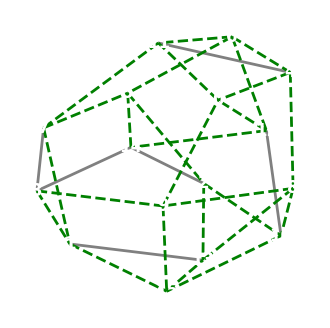

Graph with 16 nodes and 32 edges [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]

Best balanced = [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0] cost = 26.0
['0100110001111100', '0001110001111100', '1100001101100110', '1000101101100110', '0100101101100110', '0100110001110110', '1011001110001001', '1011010010011001', '0111010010011001', '0011110010011001', '1110001110000011', '1011001110000011']


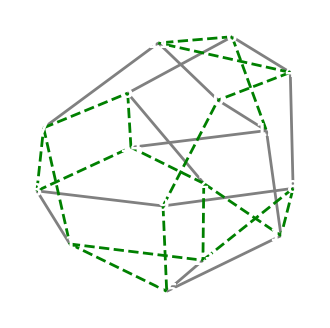

Graph with 16 nodes and 32 edges [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]

Best connected = [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0] cost = 18.0
['0111111011000000', '0110111111000000', '1110110110100000', '0101111011100000', '0100111111100000', '1110010111010000', '0110110111010000', '1110010110110000', '1110010101110000', '1100010111110000', '0100110111110000', '0110111110001000', '0110110110101000', '1111001001101000', '1101011001101000', '1100011101101000', '1110000110111000', '0110100110111000', '0110010110111000', '0110001110111000', '1111000001111000', '1110000101111000', '1100010101111000', '1111110010000100', '1111101010000100', '1011110110000100', '1111110001000100', '1111101001000100', '1111011001000100', '1110111001000100', '1011111001000100', '0111111001000100', '1011110101000100', '1011011101000100', '0011111101000100', '1110011011000100', '1011011011000100', '0110101111000100', '0011101111000100', '1110111000100100', '0111111000100100', '0011111100100100'

In [ ]:
# This is classical brute force solver results:
interpret_solution(graph, xbest_brute)
print(graph, xbest_brute)
print("\nBest solution = " + str(xbest_brute) + " cost = " + str(best_cost_brute))
print(XS_brut)

interpret_solution(graph, xbest_balanced)
print(graph, xbest_balanced)
print("\nBest balanced = " + str(xbest_balanced) + " cost = " + str(best_cost_balanced))
print(XS_balanced)

interpret_solution(graph, xbest_connected)
print(graph, xbest_connected)
print("\nBest connected = " + str(xbest_connected) + " cost = " + str(best_cost_connected))
print(XS_connected)
plt.show()

In [ ]:
# And this is how we calculate the shots counted toward scores for each class of the problems

sum_counts = 0
for bs in counts:
    if bs in XS_brut:
        sum_counts += counts[bs]

print(f"Pure max-cut: {sum_counts} out of {shots}")

sum_balanced_counts = 0
for bs in counts:
    if bs in XS_balanced:
        sum_balanced_counts += counts[bs]

print(f"Balanced max-cut: {sum_balanced_counts} out of {shots}")

sum_connected_counts = 0
for bs in counts:
    if bs in XS_connected:
        sum_connected_counts += counts[bs]

print(f"Connected max-cut: {sum_connected_counts} out of {shots}")

Pure max-cut: 99783 out of 100000
Balanced max-cut: 98456 out of 100000
Connected max-cut: 0 out of 100000


In [ ]:
def final_score(graph, XS_brut,counts,shots,ansatz,challenge):

    if(challenge=='base'):
        sum_counts = 0
        for bs in counts:
            if bs in XS_brut:
                sum_counts += counts[bs]
    elif(challenge=='balanced'):
        sum_balanced_counts = 0
        for bs in counts:
            if bs in XS_balanced:
                sum_balanced_counts += counts[bs]        
        sum_counts = sum_balanced_counts
    elif(challenge=='connected'):
        sum_connected_counts = 0
        for bs in counts:
            if bs in XS_connected:
                sum_connected_counts += counts[bs]
        sum_counts = sum_connected_counts

    
    transpiled_ansatz = transpile(ansatz, basis_gates = ['cx','rz','sx','x'])
    cx_count = transpiled_ansatz.count_ops()['cx']
    score = (4*2*graph.number_of_edges())/(4*2*graph.number_of_edges() + cx_count) * sum_counts/shots

    return np.round(score,5)

In [ ]:
print("Base score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'base')))
print("Balanced score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'balanced')))
print("Connected score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'connected')))

Base score: 0.79826
Balanced score: 0.78765
Connected score: 0.0
